### Introduction


Shopee is an e-commerce platform from Singapore which offers its service in Southeast Asia and Taiwan. 
E-Commerce companies make sure their customers get the products for the cheapest with the help of a variety of methods. One of them is product matching, through which companies allow users to get the best deals for the product sold by different retailers at different prices.

Two different images on the platform can represent the same product or two completely different products. Matching two different products with similar images may lead to confusion among the customers.

The solution to this problem can lead to more accurate product categorization, uncover marketplace spam.
Customers will benefit from more accurate listings of the same or similar products as they shop.
This will help shoppers to hunt for the very best deals.

### Business Problem

In this problem we are expected to produce a solution that can predict if two products are the same or not.
#### Business objectives
* The product matching should happen at the time when a retailer lists his product, which would help him to price the product competitively. The same system can be  used on all the existing products to make sure the platform highlights the best deal for a product.
* It should be fairly accurate.
* It should return posting_id of similar products.

#### Business Constraints

* It should work in real time, So the comparison to all the existing products should happen within a few seconds so that retailers have a good experience while listing.
* Comparing query data with all the existing data itself will take the most of the time.
* Model should be light weight so that we can deply on low end machines

### Mapping to ML/DL Problem

We have to return all the products that are similar to the queried product. This problem can be posed as a similarity problem where products with similarity above some cutoff can be considered as the same product.

#### Metrics to Evaluate Solution

The metric that is provided in the competition is **mean F1 score**. The mean is calculated in a sample-wise fashion, meaning that an F1 score is calculated for every predicted row, then averaged.

The F1 score is calculated for every queried product, then the mean of F1 score of each queried product is calculated.

For example if we have predicted a set of products A as a set of similar products to a queried product. And set B is the set of actual products that are similar to the queried product.

Then     tp = A ∩ B
    fp = A - B
    fn = B - A

Group sizes were capped at 50, so there is no benefit to predict more than 50 matches.


**NDCG**: NDCG is a metric which evaluates the recommendation system with the rankings of the results.
I have explained this metric in blog can be found here 

https://medium.com/@readsumant/understanding-ndcg-as-a-metric-for-your-recomendation-system-5cd012fb3397


### Understanding the data

The data consists of tabular and image data. The data in tabular form consists of posting ids, image ids, perceptual hashes of the images, product descriptions, and labels (Labels are the ids for all postings that are the same product).
The images are provided separately with image ids.

The data is structured as follows

#### **Train data**

Train images : train_images folder consists 34250 images
train.csv : Consists of 5 columns:

posting_id : Unique Id for each product.
image  : Image name.
Image_phash: a perceptual hash of the image.
title : title of the posting
label_group : consists of posting_ids of all the products that are similar to this product

#### **Test data**

Test Images : test_images folder consists of only 3 images
test.csv : Contains all the columns same as train.csv except label_group


### Exploratory Data Analysis




In [ ]:
!pip install stop-words
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=0596fff93f47ffa6d2011cf36721a621895057957b9fb64c17ebba4b6b022c18

  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062

Successfully built stop-words



Found existing installation: kaggle 1.5.12

Uninstalling kaggle-1.5.12:

  Successfully uninstalled kaggle-1.5.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




     |████████████████████████████████| 2.1 MB 5.1 MB/s 


  Attempting uninstall: pip

    Found existing installation: pip 21.1.3

    Uninstalling pip-21.1.3:

      Successfully uninstalled pip-21.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.0 MB

In [ ]:
!mkdir ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json 
!kaggle competitions download -c shopee-product-matching
!unzip /content/shopee-product-matching.zip

Streaming output truncated to the last 5000 lines.

  inflating: train_images/d8fce6d90ff1c758810b2132d8d9a84e.jpg  

  inflating: train_images/d90143423d8db45b382f2dee3d01fcb1.jpg  

  inflating: train_images/d903b2ab37c0418bfeb7e6e5304b64a4.jpg  

  inflating: train_images/d905748b1f61121cdcc7ae397b97052b.jpg  

  inflating: train_images/d906df4fdf70397d4f04ef0fe6ea1fe2.jpg  

  inflating: train_images/d9074f43948053971953322ed8ddc2cf.jpg  

  inflating: train_images/d9076a1375bb05c33edd5a1f1684e1f0.jpg  

  inflating: train_images/d9093fbb00a2013aad7cbcd993d779ab.jpg  

  inflating: train_images/d90ac3ff5b7d6371c50b3ef737002084.jpg  

  inflating: train_images/d90c105714e1475c4ef930e796570749.jpg  

  inflating: train_images/d90e64bea620d6e38ffe9f35b276c192.jpg  

  inflating: train_images/d9149fbfdf8d8d197f86e0a3d2ab7584.jpg  

  inflating: train_images/d914f6199e2dbafdd4a519c48dd1a5f4.jpg  

  inflating: train_images/d9159234afcf810fa9ddc7b2d49ce707.jpg  

  inflating: train_image

In [ ]:
!pip install stop-words
!pip install faiss-gpu
!pip install -q --upgrade tensorflow_hub
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=2a19e7de89a0b887793cb60a9eeea29f0dd807e5022329eb3430784bd86c6b0e

  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062

Successfully built stop-words



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     |████████████████████████████████| 85.5 MB 70 kB/s 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





     |████████████████████████████████| 3.2 MB 4.2 MB/s 




  Attempting uninstall: Pillow

    Found existing installation: Pillow 7.1.2

    Uninstalling Pillow-7.1.2:

      Successfully uninstalled Pillow-7.1.2



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





Reading package lists... Done

Building dependency tree       

Reading state information... Done

The following package was automatically installed and is no longer required:

  libnvidia-common-460

Use 'sudo apt autoremove' to remove it.

The following additional packages will be installed:

  tesseract-ocr-eng tesseract-ocr-osd

The following NEW packages will be installed:

  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd

0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.

Need to get 4,795 kB of archives.

After this operation, 15.8 MB of additional disk space will be used.

Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]

Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]

Get:3 http://archive.ubuntu.com/ubuntu bionic/universe a

In [ ]:
#importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
from tqdm import tqdm 
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
sn.set()
from seaborn import heatmap
import tqdm as tqdm
import random
import cmd
from PIL import Image
import os
import re
import string
import nltk
from stop_words import get_stop_words
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import time
from wordcloud import WordCloud
import faiss     
import sys
import tensorflow_hub as hub
import math
import pytesseract
import cv2
from prettytable import PrettyTable

[nltk_data] Downloading package wordnet to /root/nltk_data...

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Reading the train data
train = pd.read_csv('/content/train.csv')

In [ ]:
#Pretty table is used to document the training process
table = PrettyTable()
table.field_names = ["Model", 'Archetecture', 'features', 'Fscore', 'NDCG']

In [ ]:
print(train.head())
print('-'*100)
print('Length of train data set :', len(train))
print('Number of unique posting_id :', len(train.posting_id.unique()))
print('Number of unique images :', len(train.image.unique()))
print('Number of unique image_phash :', len(train.image_phash.unique()))
print('Number of unique titles :', len(train.title.unique()))
print('Number of unique label_groups :', len(train.label_group.unique()))

         posting_id                                 image       image_phash  \

0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   

1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   

2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   

3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   

4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   



                                               title  label_group  

0                          Paper Bag Victoria Secret    249114794  

1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  

2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  

3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  

4                  Nescafe \xc3\x89clair Latte 220ml   3648931069  

----------------------------------------------------------------------------------------------------

Le

In [ ]:
def plot_distribution(series, plt_title, figsize, bins=14):
  '''
  This function plot distribution of a pandas series
  '''
  plt.figure(figsize = figsize)
  plt.title(plt_title)
  series = np.array(series, dtype=int)
  sn.distplot(series, hist=True, bins=bins, kde=True, kde_kws={'bw':.2})
  plt.axvline(series.mean(),color='midnightblue',label='Mean')    
  plt.axvline(np.median(series),color='blue',label='Median')
  plt.axvline(series.max(),color='indigo',label='Max')
  plt.axvline(series.min(),color='crimson',label='Min')
  plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
  plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
  plt.legend()
  plt.show()

Analyzing the dupicated images

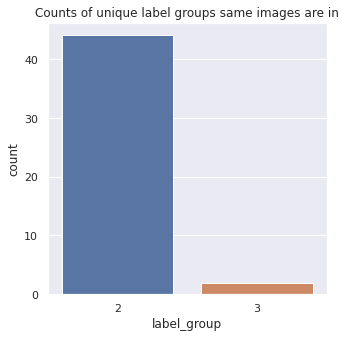

----------------------------------------------------------------------------------------------------

Total number of duplicated images is : 1246

Total number of duplicated images belonging to same label groups is : 1200

Total number of duplicated images belonging to different label groups is : 46

Total number of duplicated images belonging to 2 different label groups is : 44

Total number of duplicated images belonging to 3 different label groups is : 2


In [ ]:
plt.figure(figsize=(5,5))
sn.countplot(train.groupby('image').label_group.nunique()[train.groupby('image').label_group.nunique()>1])
plt.title('Counts of unique label groups same images are in')
plt.show()
print('-'*100)
print('Total number of duplicated images is :', 
      sum(train.groupby('image').image.count()>1))
print('Total number of duplicated images belonging to same label groups is :', 
      sum((train.groupby('image').image.count() > 1) & (train.groupby('image').label_group.nunique() == 1)))
print('Total number of duplicated images belonging to different label groups is :', 
      sum(train.groupby('image').label_group.nunique()>1))
print('Total number of duplicated images belonging to 2 different label groups is :', 
      sum(train.groupby('image').label_group.nunique() == 2))
print('Total number of duplicated images belonging to 3 different label groups is :', 
      sum(train.groupby('image').label_group.nunique() == 3))

**Observations:**
* 96% of the duplicated images belong to same label groups
* 2 of the duplicated images are in 3 differnt label groups

Analyzing image sizes

In [ ]:
#Creating a column named size with image sizes
train['size'] = [os.stat('train_images/'+ image).st_size for image in train.image]

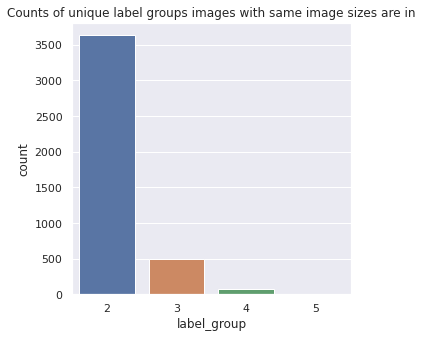

----------------------------------------------------------------------------------------------------

Total number of duplicated image sizes is : 5074

Total number of duplicated image sizes belonging to same label groups is : 876

Total number of duplicated image sizes belonging to different label groups is : 4198


In [ ]:
plt.figure(figsize=(5,5))
sn.countplot(train.groupby('size').label_group.nunique()[train.groupby('size').label_group.nunique()>1])
plt.title('Counts of unique label groups images with same image sizes are in')
plt.show()
print('-'*100)
print('Total number of duplicated image sizes is :', 
      sum(train.groupby('size').image.count()>1))
print('Total number of duplicated image sizes belonging to same label groups is :', 
      sum((train.groupby('size').image.count() > 1) & (train.groupby('size').label_group.nunique() == 1)))
print('Total number of duplicated image sizes belonging to different label groups is :', 
      sum(train.groupby('size').label_group.nunique()>1))

**Observations**
* Only 17% of the images with same size belong to same label groups

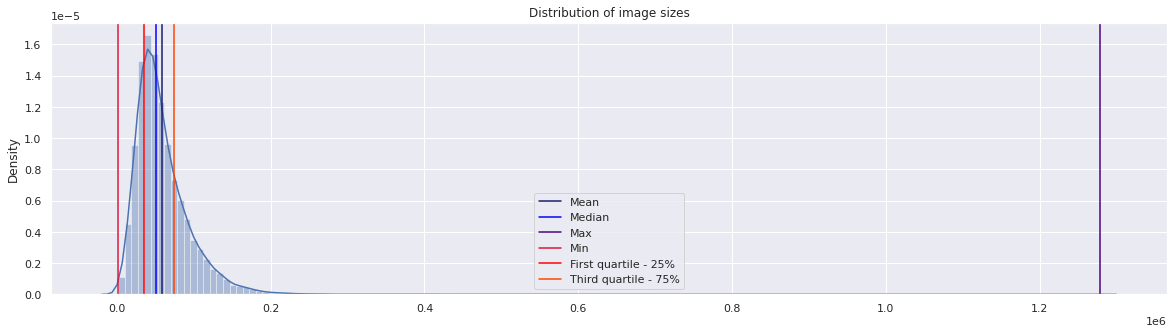

----------------------------------------------------------------------------------------------------

Number of images bigger than 95% of the all images : 1713

Number of images bigger than 99% of the all images : 343

Number of images bigger than 99.9% of the all images : 35

Size of the biggest image : 1278097


In [ ]:
plt_title = 'Distribution of image sizes'
figsize = (20,5)
plot_distribution(train['size'], plt_title, figsize, bins=150)

print('-'*100)
print('Number of images bigger than 95% of the all images :',
      sum(train['size'] > np.quantile(train['size'], 0.95)))
print('Number of images bigger than 99% of the all images :',
      sum(train['size'] > np.quantile(train['size'], 0.99)))
print('Number of images bigger than 99.9% of the all images :',
      sum(train['size'] > np.quantile(train['size'], 0.999)))
print('Size of the biggest image :',
      train['size'].max())

Analyzing Label Groups

In [ ]:
#Create a column containing all the products with same label group
tmp = train.groupby('label_group').posting_id.agg('unique').to_dict()
train['target'] = train.label_group.map(tmp)
#Create a column with count of products sharing same label group
tmp = train.groupby('label_group').posting_id.agg('count').to_dict()
train['target_count'] = train.label_group.map(tmp)

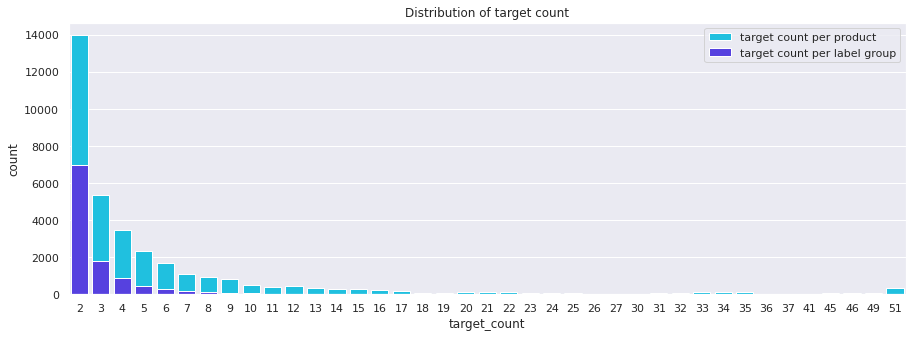

In [ ]:
#Plotting distribution of target count feature
plt.figure(figsize=(15,5))
sn.countplot(train['target_count'], palette=['#00D5FF'])
sn.countplot(train.drop_duplicates(subset=['label_group'], keep='last').target_count, palette=["#4327F9"])
plt.legend(['target count per product', 'target count per label group'])
plt.title('Distribution of target count')
plt.show()

**Observations**
* Most of the label groups have less than 9 products.
* One label group has 51 products

#### Analyzing images



Plotting random products

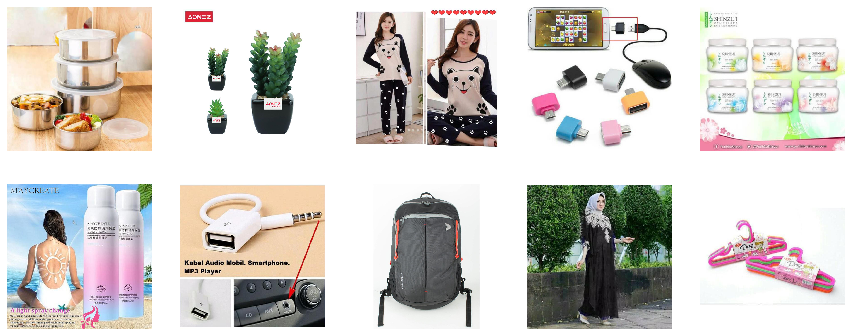

In [ ]:
#Plotting images of random products
rnd = np.random.choice(range(len(train)), size=10)
plt.figure(figsize=(15,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  image = 'train_images/' + str(train.image[rnd[i]])
  image = plt.imread(image)
  plt.axis('off')
  plt.imshow(np.asarray(image), interpolation='nearest')

Plotting of images with same label groups



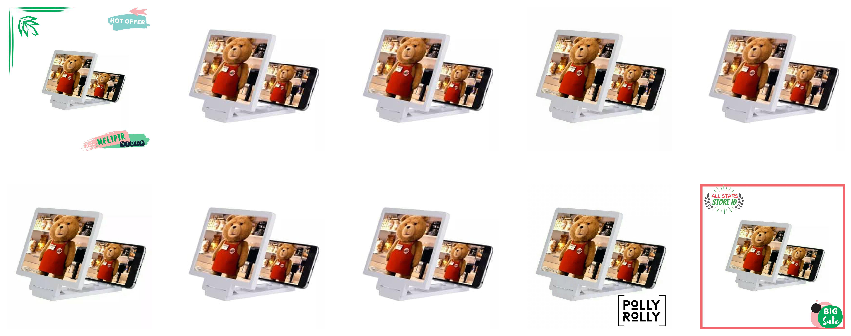

In [ ]:
label = list(train.label_group[train.target_count>9])
rnd = np.random.randint(len(label))
images = list(train.image[train.label_group == label[rnd]])
plt.figure(figsize=(15,6))
for i in range(min(len(images),10)):
  plt.subplot(2,5,i+1)
  image = 'train_images/' + str(images[i])
  image = plt.imread(image)
  plt.axis('off')
  plt.imshow(np.asarray(image), interpolation='nearest')

**Observations**
* Images of products of same label group may be very different

Plotting of image with same titles

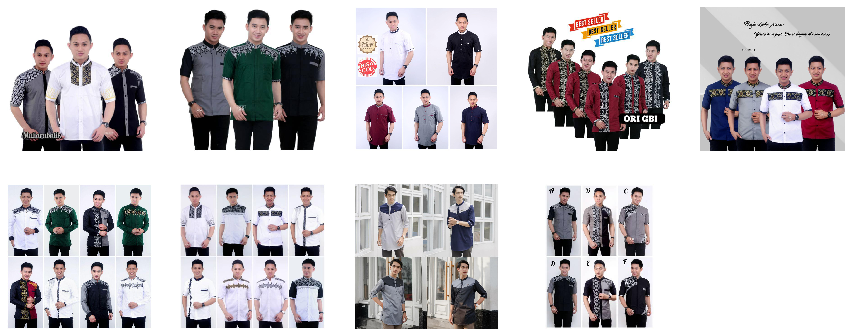

In [ ]:
#Plotting of image with same titles
tmp = train.groupby('title').image.nunique() == train.groupby('title').image.nunique().max()
label = list(tmp.index[tmp])[0]
images = list(train.image[train.title == label])
plt.figure(figsize=(15,6))
for i in range(min(len(images),10)):
  plt.subplot(2,5,i+1)
  image = 'train_images/' + str(images[i])
  image = plt.imread(image)
  plt.axis('off')
  plt.imshow(np.asarray(image), interpolation='nearest')

**Observations**
* Images of same titles are very similar

Plotting of image with same p hash

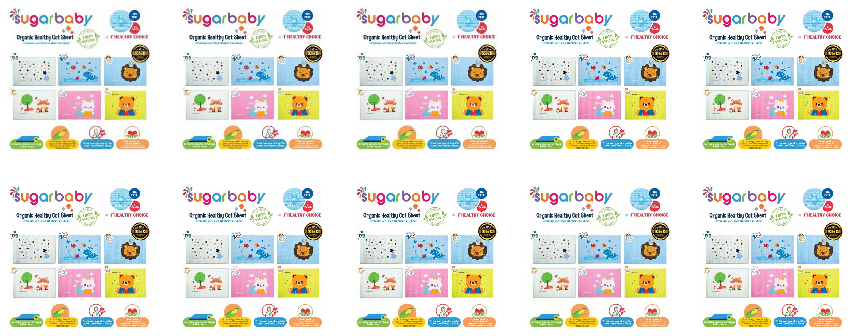

In [ ]:
#Plotting of image with same p hash
tmp = train.groupby('image_phash').image.nunique() == train.groupby('image_phash').image.nunique().max()
label = list(tmp.index[tmp])[0]
images = list(train.image[train.image_phash == label])
plt.figure(figsize=(15,6))
for i in range(min(len(images),10)):
  plt.subplot(2,5,i+1)
  image = 'train_images/' + str(images[i])
  image = plt.imread(image)
  plt.axis('off')
  plt.imshow(np.asarray(image), interpolation='nearest')

**Observations**
* Images of same p hash are also very much similar as pHash is derived from the images

#### Analyzing pHash

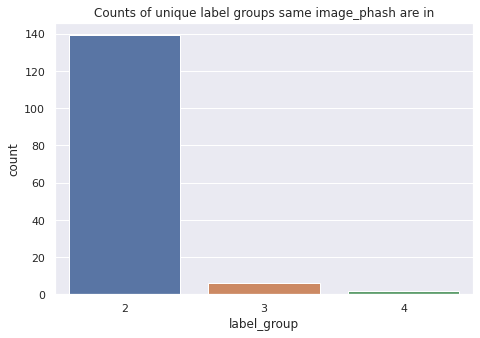

----------------------------------------------------------------------------------------------------

Total number of duplicated image_phash is : 3229

Total number of duplicated image_phash belonging to same label groups is : 3082

Total number of duplicated image_phash belonging to different label groups is : 147

Total number of duplicated image_phash belonging to 2 different label groups is : 139

Total number of duplicated image_phash belonging to 3 different label groups is : 6

Total number of duplicated image_phash belonging to 4 different label groups is : 2


In [ ]:
#Plotting counts of unique label groups same image_phash are in
plt.figure(figsize=(7.5,5))
sn.countplot(train.groupby('image_phash').label_group.nunique()[train.groupby('image_phash').label_group.nunique()>1])
plt.title('Counts of unique label groups same image_phash are in')
plt.show()
print('-'*100)
print('Total number of duplicated image_phash is :', 
      sum(train.groupby('image_phash').image.count()>1))
print('Total number of duplicated image_phash belonging to same label groups is :', 
      sum((train.groupby('image_phash').image.count() > 1) & (train.groupby('image_phash').label_group.nunique() == 1)))
print('Total number of duplicated image_phash belonging to different label groups is :', 
      sum(train.groupby('image_phash').label_group.nunique()>1))
print('Total number of duplicated image_phash belonging to 2 different label groups is :', 
      sum(train.groupby('image_phash').label_group.nunique() == 2))
print('Total number of duplicated image_phash belonging to 3 different label groups is :', 
      sum(train.groupby('image_phash').label_group.nunique() == 3))
print('Total number of duplicated image_phash belonging to 4 different label groups is :', 
      sum(train.groupby('image_phash').label_group.nunique() == 4))

**Observations**
* 95% of the duplicated image_phash belong to same label groups
* 4% of the duplcated image_phash belong to 2 different label groups

#### Analyzing title

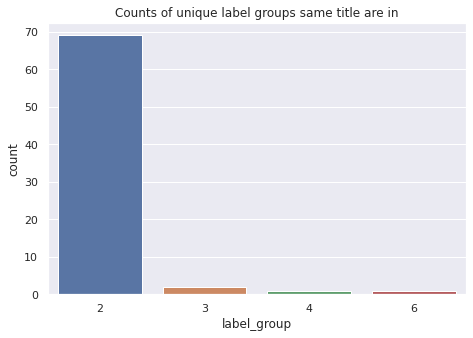

----------------------------------------------------------------------------------------------------

Total number of duplicated title is : 962

Total number of duplicated title belonging to same label groups is : 889

Total number of duplicated title belonging to different label groups is : 73

Total number of duplicated title belonging to 2 different label groups is : 69

Total number of duplicated title belonging to 3 different label groups is : 2

Total number of duplicated title belonging to 4 different label groups is : 1

Total number of duplicated title belonging to 5 different label groups is : 0

Total number of duplicated title belonging to 6 different label groups is : 1


In [ ]:
plt.figure(figsize=(7.5,5))
sn.countplot(train.groupby('title').label_group.nunique()[train.groupby('title').label_group.nunique()>1])
plt.title('Counts of unique label groups same title are in')
plt.show()
print('-'*100)
print('Total number of duplicated title is :', 
      sum(train.groupby('title').image.count()>1))
print('Total number of duplicated title belonging to same label groups is :', 
      sum((train.groupby('title').image.count() > 1) & (train.groupby('title').label_group.nunique() == 1)))
print('Total number of duplicated title belonging to different label groups is :', 
      sum(train.groupby('title').label_group.nunique()>1))
print('Total number of duplicated title belonging to 2 different label groups is :', 
      sum(train.groupby('title').label_group.nunique() == 2))
print('Total number of duplicated title belonging to 3 different label groups is :', 
      sum(train.groupby('title').label_group.nunique() == 3))
print('Total number of duplicated title belonging to 4 different label groups is :', 
      sum(train.groupby('title').label_group.nunique() == 4))
print('Total number of duplicated title belonging to 5 different label groups is :', 
      sum(train.groupby('title').label_group.nunique() == 5))
print('Total number of duplicated title belonging to 6 different label groups is :', 
      sum(train.groupby('title').label_group.nunique() == 6))

**Observations**
* 92% of the duplicated title belong to same label groups

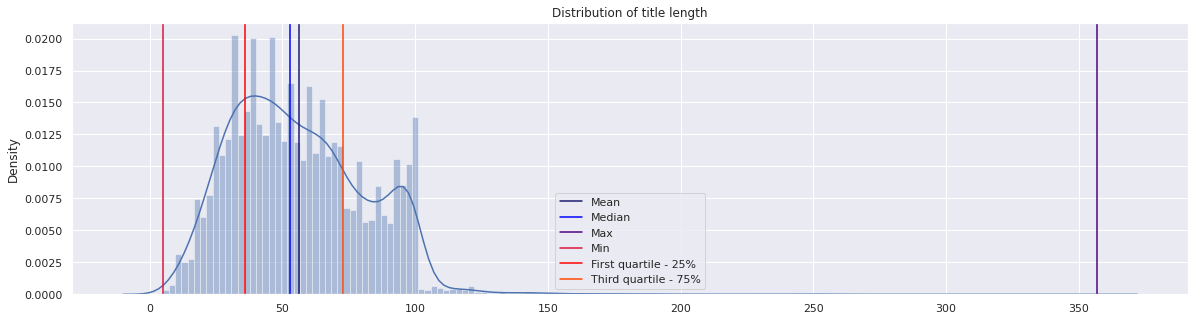

----------------------------------------------------------------------------------------------------

Number of titles longer than 95% of the all titles : 1624

Number of titles longer than 99% of the all titles : 341

Number of titles longer than 99.9% of the all titles : 34

Length of the longest title : 357


In [ ]:
plt_title = 'Distribution of title length'
figsize = (20,5)
tmp = train['title'].str.len()
plot_distribution(tmp, plt_title, figsize, bins=150)

print('-'*100)
print('Number of titles longer than 95% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.95)))
print('Number of titles longer than 99% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.99)))
print('Number of titles longer than 99.9% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.999)))
print('Length of the longest title :',
      tmp.max())

In [ ]:
print('longest title is : \n',list(train.title[train.title.str.len() == train.title.str.len().max()])[0])

longest title is : 

 Mukena Bali Polos Rayon Janger Jumbo rample Adem Premium \xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80\xe3\x80\x80 #produkbali


Most of the text in title is a junk, So lets do the preprocessing

In [ ]:
def preprocessing(text):
  '''
  This function takes raw text Converts uppercase to Lower, Removes special charecters, stop words 
  and text that follows special charecters (Ex \xe3\x80\x80\)
  '''

  text=text.strip() #Strips the sentence into words
  text = text.lower() #Converts uppercase letters to lowercase
  text = text.split(' ') #Splitting sentence to words
  dummy = []
  for i in text:
    if i[:2] == '\\x':
      special_texts = i.split('\\')
      for j in special_texts:
        if len(j) > 3:
          dummy.append(re.sub('[^A-Za-z0-9]+', '', j[3:]))
    else:
      special_texts = i.split('\n')
      for j in special_texts:
        dummy.append(re.sub('[^A-Za-z0-9]+', '', j))
  text = dummy
  stopwords = get_stop_words('english') + get_stop_words('indonesian') #Getting stopwords from english and indonesian languages
  text = [i for i in text if i not in stopwords] ##Removing stopwords
  wordnet_lemmatizer = WordNetLemmatizer() #Loading Lemmetizer
  text = [wordnet_lemmatizer.lemmatize(word) for word in text] #Lemmetizing the text
  text = " ".join([i for i in text if len(i) < 15]) #Remove the words longer than 15 charecters
  text = "".join([i for i in text if i not in string.punctuation]) #Removing special charecters
  return text

def get_hastags(text):
  '''
  This function takes raw text and returns all the hash tags from the text
  '''

  text=text.strip() #Strips the sentence into words
  text = text.lower() #Converts uppercase letters to lowercase
  text = text.split(' ') #Splitting sentence to words
  hasttags = [i for i in text if (len(i) > 1) and i[0] == '#']  #Getting the hashtags

  return hasttags

In [ ]:
#Longest length title after preprocessing 
print(preprocessing(list(train.title[train.title.str.len() == train.title.str.len().max()])[0]))

mukena bali polo rayon janger jumbo rample adem premium produkbali


In [ ]:
#Creating columns with preprocessed title and hash tags used in the title
train['prep_title'] = train.title.map(preprocessing)
train['Hastags'] = train.title.map(get_hastags)

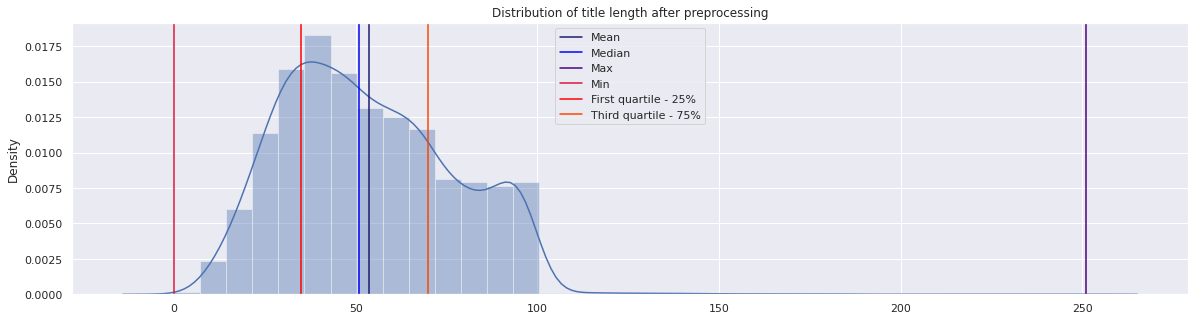

----------------------------------------------------------------------------------------------------

Number of titles longer than 95% of the all titles : 1442

Number of titles longer than 99% of the all titles : 314

Number of titles longer than 99.9% of the all titles : 35

Length of the longest title : 251


In [ ]:
plt_title = 'Distribution of title length after preprocessing'
figsize = (20,5)
tmp = train['prep_title'].str.len()
plot_distribution(tmp, plt_title, figsize, bins=35)

print('-'*100)
print('Number of titles longer than 95% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.95)))
print('Number of titles longer than 99% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.99)))
print('Number of titles longer than 99.9% of the all titles :',
      sum(tmp > np.quantile(tmp, 0.999)))
print('Length of the longest title :',
      tmp.max())

In [ ]:
print('longest title after preprocessing is : \n',list(train.prep_title[train.prep_title.str.len() == 
                                                                train.prep_title.str.len().max()])[0])

longest title after preprocessing is : 

 soft case silikon motif kartun beruang warna permen untuk oppo a53 2020 reno 4 a5s a5 2020 a3s a92 a31 a12 a9 2020 f9 pro a37 a37f f1s f11 a1k f7 a52 a71 f5 youth a7 a31 a33 2020 a91 reno 2f reno 3 a72 a12e realme c15 c12 5i c11 c2 c3 3 3i 5 5 6 c1 6i


In [ ]:
print('Number of products with hashtags is :', sum(train['Hastags'].str.len() > 0))

Number of products with hashtags is : 81


In [ ]:
print('Shortest title after preprocessing is : \n',list(train.prep_title[train.prep_title.str.len() == 
                                                                train.prep_title.str.len().min()])[0])
print('Lets remove the titles with 0 length')
train = train[~train.label_group.isin(train.label_group[train.prep_title.str.len() == 0])]

print('Shortest title now : \n',list(train.prep_title[train.prep_title.str.len() == 
                                                                train.prep_title.str.len().min()])[0])

Shortest title after preprocessing is : 

 

Lets remove the titles with 0 length

Shortest title now : 

 yz37


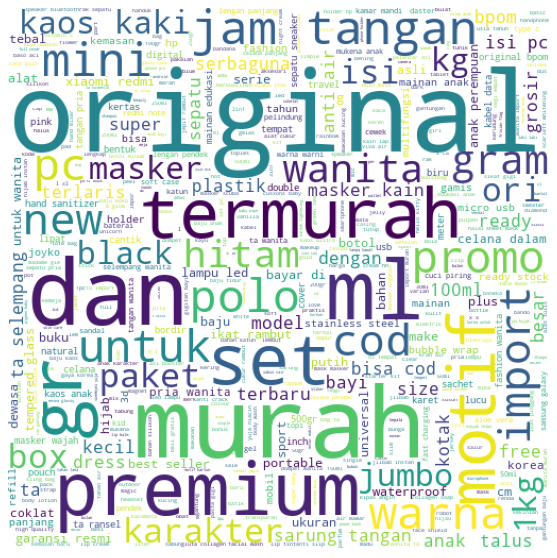

In [ ]:
text = " ".join([i for i in train.prep_title]) 
wordcloud = WordCloud(background_color='white',
                    max_words = 500,
                    max_font_size = 120,
                    width = 512,
                    height = 512
)
wordcloud.generate(text)
plt.figure(figsize = (10,10), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
class distance:

  def process_phash(self, phash):
    return np.binary_repr(int(phash, 16))

  def hamming_distance(self, bnryphsh_query, bnryphsh_target):
    return np.count_nonzero(np.array(list(bnryphsh_query)) != np.array(list(bnryphsh_target)))

  def get_hamming_distance(self, lst):
    output = []
    lst = list(lst)
    a = lst[0]
    for i in range(1, len(lst)):
      b = lst[i]
      output.append(self.hamming_distance(a, b))
    return output

distance = distance()

In [ ]:
print('Average hamming distance from phashbinary of first data point to other datapoints is :', 
      np.mean(distance.get_hamming_distance(train.image_phash.map(distance.process_phash))))

Average hamming distance from phashbinary of first data point to other datapoints is : 32.294385698428464


### Solving the Problem

In [ ]:
#Importing libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from scipy.sparse import linalg, csr_matrix
!pip install -q efficientnet
import efficientnet.tfkeras as efn
from tensorflow import image
!pip install -q -U "tensorflow-text==2.9.*"
import tensorflow_text as text

     |████████████████████████████████| 50 kB 4.4 MB/s 

     |████████████████████████████████| 4.6 MB 7.3 MB/s 



Functions that we would be using throught the notebook

In [ ]:
def get_fscore(dataset, d_matrix, i_matrix, thold):
  '''
  This function takes a dataset, distance matrix, index matrix and a threshold
  Calculates the F1 score for the threshold
  '''

  f1_list = []
  for i in range(len(dataset)):
    true_i = dataset.similars[i]

    pred_i = set(i_matrix[i,np.where(d_matrix[i] < thold)[0]])

    tp = len(true_i.intersection(pred_i)) 

    f1 = 2*tp/(len(true_i)+ len(pred_i))
    f1_list.append(f1)
      
  return np.mean(f1_list)

def get_best_fscore(dataset, d_matrix, i_matrix):
  '''
  This function takes a dataset, distance matrix and a index matrix of similar products
  return the best F1 score with the threshold used to achieve that score
  '''

  mx = d_matrix[:,50].min()
  mn = 0
  mx_score = 0
  mx_thold = 0

  for i in tqdm.tqdm(range(21)):
    thold = i*((mx-mn)/20) + mn

    f1 = get_fscore(dataset, d_matrix, i_matrix, thold)

    if f1>mx_score:
      mx_score = f1
      mx_thold = thold

  return mx_score, mx_thold

def get_idcg(true_i):
  '''
  This function takes true indices and calculates and returns Ideal DCG
  '''
  return np.sum(1/np.log2(np.arange(2,2+len(true_i))))

def get_dcg(pred_i, true_i):
  '''
  This function takes true and predicted indices and returns discounted cumulative gain
  '''
  return np.sum(np.isin(pred_i, true_i)/np.log2(np.arange(2,2+len(pred_i))))


def get_ndcg(dataset, i_matrix):
  '''
  This function takes the dataset and indices of predicted predicted similar products
  and retunrns Normalized discounted cumulative gain. 
  '''
  ndcg = []
  for i in range(len(dataset)):
    true_i = np.where(dataset.label_group == dataset.label_group[i])[0]
    pred_i = i_matrix[i]

    ndcg.append(get_dcg(pred_i, true_i)/get_idcg(true_i))

  return np.mean(ndcg)

def get_neighbours(embeddings):
  '''
  This function takes predicted embeddings and returns 
  distance and indices of 50 similar products for all the the products
  '''
  index = faiss.IndexFlatL2(embeddings.shape[1])
  for e in embeddings:
    index.add(e.reshape(1,-1))
  d_matrix, i_matrix = index.search(embeddings,51)

  return d_matrix, i_matrix

Train Test Split

In [ ]:
#While splitting we make sure all the same products are in the same group
train_label_groups, valid_test_label_groups = train_test_split(train.label_group.unique(), test_size=0.2) #Splitting the data set into train and test
valid_label_groups, test_label_groups = train_test_split(valid_test_label_groups, test_size=0.5)

#We split dataset into train, validation and test datasets
train_dataset = train[train.label_group.isin(train_label_groups)].reset_index()
valid_dataset = train[train.label_group.isin(valid_label_groups)].reset_index()
test_dataset = train[train.label_group.isin(test_label_groups)].reset_index()

print('Length of training dataset :', len(train_dataset))
print('Length of validation dataset :', len(valid_dataset))
print('Length of test dataset :', len(test_dataset))

Length of training dataset : 27175

Length of validation dataset : 3563

Length of test dataset : 3512


Image features

In [ ]:
image_size = [224,224] #We will convert all the images to 224x224x3 size

def decode_image(image_data):
  '''
  This function takes the location of a image data
  converts it and returns tensors
  '''
  img = tf.io.read_file(image_data)
  img = tf.io.decode_jpeg(img, channels = 3)
  img = image.resize(img, image_size)
  img = tf.cast(img, tf.float32) / 255.0 
  return img

def image_augmentation(image_data):
  '''
  This function augments the input images
  '''
  img = decode_image(image_data)
  img = image.random_flip_left_right(img)
  img = image.random_flip_up_down(img)
  img = image.random_contrast(img, 0.85, 1.15)
  img = image.random_hue(img, 0.01)
  img = image.random_brightness(img, 0.10)
  img = image.random_saturation(img, 0.85, 1.15)

  return img

def load_image_dataset(images, location):
  '''
  this function takes image names and location
  returns tensorflow dataset
  '''
  images = list(images)
  images = [location+i for i in images]
  images = tf.data.Dataset.from_tensor_slices(images)
  images = images.map(decode_image)
  images = images.batch(64, drop_remainder=False)
  images = images.prefetch(8)

  return images

In [ ]:
#loading images as a tf dataset
train_images = load_image_dataset(train_dataset.image, '/content/train_images/')
valid_images = load_image_dataset(valid_dataset.image, '/content/train_images/')
test_images = load_image_dataset(test_dataset.image, '/content/train_images/')

Baseline Model

In [ ]:
#Loading pretrained MobleNet model
model = tf.keras.applications.MobileNet(weights = 'imagenet', 
                                        include_top = False, input_shape=(224,224,3), pooling='avg')

#get test and valid images embeddings
valid_embeddings = model.predict(valid_images, verbose = 1)
test_embeddings = model.predict(test_images, verbose = 1)


17225924/17225924 [==============================] - 0s 0us/step

56/56 [==============================] - 157s 3s/step

55/55 [==============================] - 130s 2s/step


In [ ]:
a = []
for i in range(len(valid_dataset)):
  a.append(set(np.where(valid_dataset.label_group == valid_dataset.label_group[i])[0]))
valid_dataset['similars'] = a

a = []
for i in range(len(test_dataset)):
  a.append(set(np.where(test_dataset.label_group == test_dataset.label_group[i])[0]))
test_dataset['similars'] = a

In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 12.19it/s]


Best score on validation set : 0.6757115986445871, Best Threshold : 290.91522

Score on test set with Threshold 290.91522 is 0.68011

test NDCG core : 0.8415589180788593


In [ ]:
table.add_row(['Baseline', 'MobileNet', 'Image', '0.68', '0.8415'])

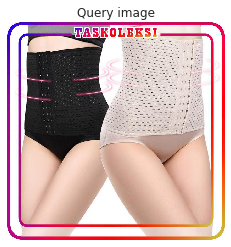

----------------------------------------------------------------------------------------------------

Images with least distance


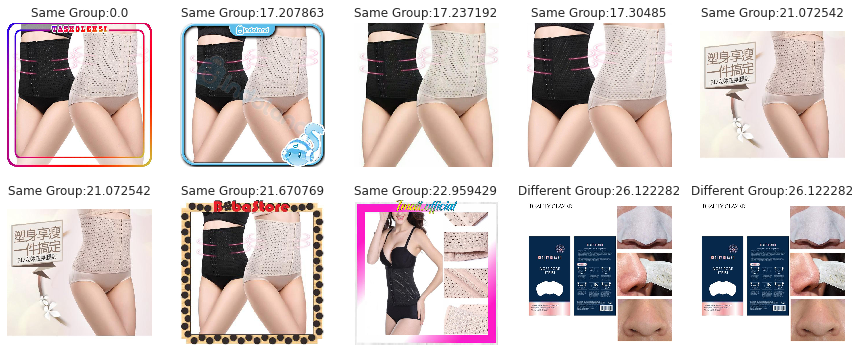

In [ ]:
#Plotting a random image
rnd = np.random.randint(len(valid_dataset))
img = 'train_images/' + str(valid_dataset.image[rnd])
img = plt.imread(img)
plt.axis('off')
plt.title('Query image')
plt.imshow(np.asarray(img), interpolation='nearest')
plt.show()
print('-'*100)

#Plotting nearest neighbours of the random image
print('Images with least distance')
distances = np.array([np.linalg.norm(valid_embeddings[rnd] - valid_embeddings[i]) for i in range(len(valid_embeddings))])
similar_image_indices = np.argsort(distances)[:10]
images = list(valid_dataset.image[similar_image_indices])
plt.figure(figsize=(15,6))
for i in range(min(len(images),10)):
  plt.subplot(2,5,i+1)
  img = 'train_images/' + str(images[i])
  img = plt.imread(img)
  plt.axis('off')
  if valid_dataset.label_group[rnd] == valid_dataset.label_group[similar_image_indices[i]]:
    plt.title('Same Group:'+ str(distances[similar_image_indices[i]]))
  else:
    plt.title('Different Group:'+ str(distances[similar_image_indices[i]]))
  plt.imshow(np.asarray(img), interpolation='nearest')
plt.show()

Creating a custom callback function that checks fscore on validation data on each epoch

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
  '''
  This is a custom callback everytime the callback is called it takes the validation data
  and embedding layer output and calculates the best score and saves the model if its better than previous
  '''
  
  def __init__(self, images, dataset, embedding_model, CheckpointDir):
    super(CustomCallback, self).__init__()
    self.images = images
    self.dataset = dataset
    self.embedding_model = embedding_model
    self.CheckpointDir = CheckpointDir


  def on_train_begin(self, logs={}):
    ## on begin of training, we are creating a instance varible called history
    ## it is a dict with keys [loss, acc, val_loss, val_acc]
    self.history={'loss': [],'val_loss': [],'val_fscore': []}


  def on_epoch_end(self, epoch, logs={}):

    embeddings = self.embedding_model.predict(self.images) #Getting the embeddings
    d_matrix, i_matrix = get_neighbours(embeddings) #Getting distance and index matrix of 50 neighbours
    mx_score, mx_thold = get_best_fscore(self.dataset, d_matrix, i_matrix) #Get threshold and best score

    print(' Score : {}'.format(mx_score))

    if len(self.history['val_fscore']) == 0:
      dir = self.CheckpointDir+str(mx_score)
      self.embedding_model.save(dir) #Save model if its the first epoch

    if len(self.history['val_fscore']) >0:
      if self.history['val_fscore'][-1]< mx_score:
        dir = self.CheckpointDir +str(mx_score)
        self.embedding_model.save(dir) #Save the model if score has increased in last 2 epochs

    self.history['val_fscore'].append(mx_score)

Contrastive Loss

Understanding Contrastive Loss

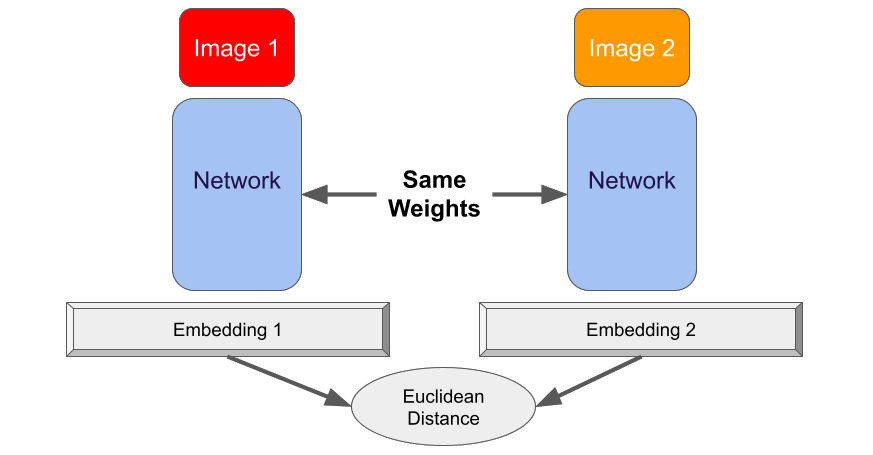

* In this archetecture we will be feeding 2 images as inputs seperately to same model to get an embedding.
* If the two images are similar we expect to get embeddings nearer to each other.
* Once we pass the images we calculate the euclidean distance between the embeddings.
* The distance would be the output of our model
* Then we use the below function to calculate the loss


Contrastive loss given by le cunn

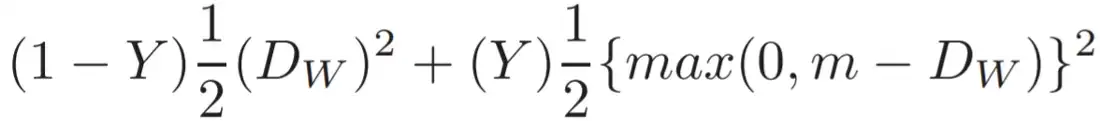

Here:
* Y : Ground truth (1 or 0)
* Dw : Euclidean distance
* m : Margin

In [ ]:
def get_pairs(data):
  '''
  This function takes a dataframe and returns pairs of two images and a target
  target says if the two images are of same label group or not 
  '''
  anchor_list = []
  positive_list = []
  negative_list = []
  pairs = []

  print('getting pairs...')
  for i in tqdm.tqdm(range(len(data))):
    anchor = data.image[i] #for every image

    positives = list(data.image[data.label_group == data.label_group[i]]) #Finding images with same label group
    negatives = list(data.image[data.label_group != data.label_group[i]]) #Finding image with different label group

    positives = [random.choice(positives)] #select 1 random image from the list
    negatives = [random.choice(negatives)]
    
    for j in range(len(positives)):
      if (positives[j], anchor) not in pairs: #make sure the image pairs are not already in the list
        anchor_list.append(anchor)
        positive_list.append(positives[j])
        negative_list.append(negatives[j])

        pairs.append((anchor, positives[j])) #making the list of pairs already selected
  
  #Make a 2D list of anchor images, positive and negative images and target (1 for positive image, 0 for negative image)
  lst = list(zip(anchor_list+anchor_list, positive_list+negative_list, [1.0]*len(positive_list)+[0.0]*len(negative_list)))

  #conver list to dataframe
  df = pd.DataFrame(lst, columns =['image1', 'image2', 'target'])
  return df

#Get train paired dataset
traindf = get_pairs(train_dataset)

getting pairs...


100%|██████████| 27595/27595 [02:31<00:00, 182.68it/s]


In [ ]:
def get_dataset(df, train):
  '''
  This function takes a dataframe and a boolean variable
  returns tensorflow dataset in contrastive model format
  ((image1, image2), target)
  '''
  image1 = df.image1
  image2 = df.image2
  target = df.target

  #get image locations
  image1 = ['/content/train_images/'+i for i in image1]
  image2 = ['/content/train_images/'+i for i in image2]

  #Get tensors from image location lists
  image1 = tf.data.Dataset.from_tensor_slices(image1)
  image2 = tf.data.Dataset.from_tensor_slices(image2)
  target = tf.data.Dataset.from_tensor_slices(target)

  if train: #If its a training data augment image
    image1 = image1.map(image_augmentation)
    image2 = image2.map(image_augmentation)
  else: #If its for validation or test no augmentation
    image1 = image1.map(decode_image)
    image2 = image2.map(decode_image)

  dataset = tf.data.Dataset.zip(((image1, image2), target)) #Ziping tensorslices to dataset
  dataset = dataset.batch(64, drop_remainder=False) #Creating Batches
  if train: #If its training data repeat the dataset for continuous training
    dataset = dataset.repeat()
  dataset = dataset.prefetch(8) #Prefetch dataset for faster loading

  return dataset

train_set = get_dataset(traindf, True) #Get tf dataset

In [ ]:
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    '''
    This function takes 2 vectors and returns euclidean distance between them
    '''
    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

In [ ]:
#Defining and initializing Models
#Pretrained MobileNet is used and a base model and 1 conv and 2 dense layers are 
#addded on it one of them is output layer
model = tf.keras.applications.MobileNet(weights = 'imagenet',
                                        include_top = False, input_shape=(224,224,3), dropout=0.1)
output = tf.keras.layers.Conv2D(1024, 3, (2,2))(model.output)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(256, activation='relu')(output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.05)(output)
output = tf.keras.layers.Dense(128)(output)


shape = model.input.shape[1:]
input = tf.keras.layers.Input(shape=shape)

embedding = tf.keras.Model(model.input, output) #Embedding Model embeddes the image into 128 len  vector
embedding.trainable = True

input1 = tf.keras.layers.Input(shape=shape)
input2 = tf.keras.layers.Input(shape=shape)

tower_1 = embedding(input1)
tower_2 = embedding(input2)
'''
In contrastive model tower1 and tower2 are with same embedding model with same weight
'''
#This layer calculates euclidean distance between outputs from tower1 and tower2
merge_layer = tf.keras.layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer) #Normalizing distance output
#This layer decides if the images are same or not based on the distance between them
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(normal_layer)
#Defining contrastive Model
contrastive = tf.keras.Model(inputs=[input1, input2], outputs=normal_layer)

In [ ]:
def loss(margin=2):
    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        '''
        This function calculates contrastive loss
        '''
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

In [ ]:
#Defining the callbacks
checkpoint_dir = 'contrastive/'
my_callbacks = [
    CustomCallback(valid_images, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
#Compiling model and looking at the summary
contrastive.compile(loss=loss(margin=1), optimizer=tf.keras.optimizers.Adam(0.0001))
contrastive.summary()

Model: "model_6"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               

                                )]                                                                

                                                                                                  

 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               

                                )]                                                                

                                                                                                  

 model_5 (Functional)           (None, 128)          12963392    ['input_15[0][0]',               

                                                                  'input_16[0][0]

In [ ]:
contrastive.fit(train_set, epochs=10, callbacks=my_callbacks, steps_per_epoch=500)

Epoch 1/10

  6/500 [..............................] - ETA: 6:24 - loss: 0.2500

54/54 [==============================] - 11s 198ms/step


100%|██████████| 21/21 [00:02<00:00,  9.61it/s]


 Score : 0.5111935513119898


500/500 [==============================] - 441s 843ms/step - loss: 0.2486

Epoch 2/10

54/54 [==============================] - 11s 203ms/step


100%|██████████| 21/21 [00:02<00:00,  9.92it/s]

 Score : 0.5103373662290913

500/500 [==============================] - 400s 800ms/step - loss: 0.2504

Epoch 3/10


54/54 [==============================] - 11s 200ms/step


100%|██████████| 21/21 [00:02<00:00,  9.96it/s]


 Score : 0.5904929062651338


500/500 [==============================] - 410s 820ms/step - loss: 0.2518

Epoch 4/10

54/54 [==============================] - 11s 200ms/step


100%|██████████| 21/21 [00:01<00:00, 10.77it/s]

 Score : 0.5860282059774388

500/500 [==============================] - 404s 809ms/step - loss: 0.2486

Epoch 5/10


54/54 [==============================] - 11s 206ms/step


100%|██████████| 21/21 [00:02<00:00,  9.50it/s]

 Score : 0.5817632687453423

500/500 [==============================] - 410s 820ms/step - loss: 0.2505

Epoch 6/10


54/54 [==============================] - 11s 201ms/step


100%|██████████| 21/21 [00:01<00:00, 11.21it/s]

 Score : 0.5594262073129947

500/500 [==============================] - 411s 823ms/step - loss: 0.2515

Epoch 7/10


54/54 [==============================] - 11s 203ms/step


100%|██████████| 21/21 [00:02<00:00,  9.60it/s]


 Score : 0.5991073603782634


500/500 [==============================] - 415s 831ms/step - loss: 0.2487

Epoch 8/10

54/54 [==============================] - 11s 202ms/step


100%|██████████| 21/21 [00:02<00:00,  9.08it/s]

 Score : 0.5574480646345656

500/500 [==============================] - 409s 818ms/step - loss: 0.2506

Epoch 9/10


54/54 [==============================] - 11s 206ms/step


100%|██████████| 21/21 [00:02<00:00, 10.05it/s]


 Score : 0.6050251661726177


500/500 [==============================] - 423s 847ms/step - loss: 0.2513

Epoch 10/10

54/54 [==============================] - 11s 206ms/step


100%|██████████| 21/21 [00:02<00:00,  9.72it/s]

 Score : 0.5973067715655275

500/500 [==============================] - 422s 844ms/step - loss: 0.2488


In [ ]:
#Getting the best model
embedding = tf.keras.models.load_model('/content/contrastive/0.5973067715655275/')

#Getting the embeddings
valid_embeddings = embedding.predict(valid_images, verbose = 1)
test_embeddings = embedding.predict(test_images, verbose = 1)

56/56 [==============================] - 171s 3s/step

55/55 [==============================] - 167s 3s/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:03<00:00,  5.65it/s]



Best score on validation set : 0.59730, Best Threshold : 322.43812

Score on test set with Threshold 322.43812 is 0.57387

test NDCG core : 0.79495


In [ ]:
table.add_row(['Contrastive Loss', 'MobileNet + Additional Layers', 'Image', '0.57', '0.79'])

Triplet Loss

Understanding triplet loss

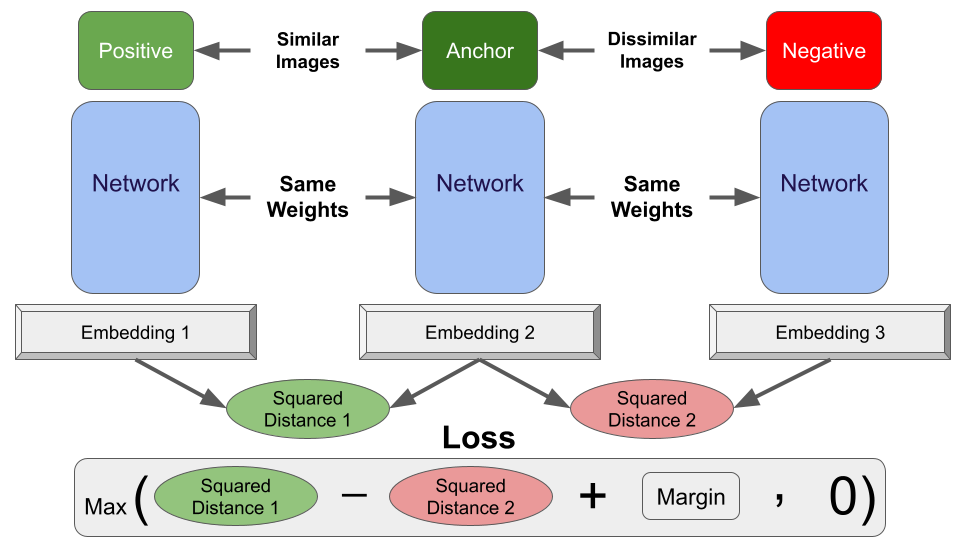

* We first make triplets out of the dataset in the form of anchor, similar data, dissimilar data.
* In this archetecture we will be feeding 3 images (data points) as inputs seperately to same model to get embeddings.
* We calculate the squared distance between the anchor embedding and similar data point embedding and dissimilar data point embedding
* if the squared distance between anchor embedding and similar embedding is less than squared distance between anchor embedding and dissimilar embedding by a fixed margin then we consider the loss as zero, else as the same.


In [ ]:
def get_triplets(data):
  '''
  This function takes a dataframe
  returns a dataframe containing a triplet of
  anchor image, similar image and a dissimilar image
  '''
  anchor_list = []
  positive_list = []
  negative_list = []
  pairs = []
  print('getting triplets...')
  for i in tqdm.tqdm(range(len(data))):
    anchor = data.image[i] #Get Anchor images
    positives = list(data.image[data.label_group == data.label_group[i]]) #Get images of same label grp as anchor image
    negatives = list(data.image[data.label_group != data.label_group[i]]) #Get images of different label group
    negatives = np.random.choice(negatives, len(positives)) #Get the same number of negatives as 
    for j in range(len(positives)):
      if (positives[j], anchor) not in pairs:
        anchor_list.append(anchor)
        positive_list.append(positives[j])
        negative_list.append(negatives[j])

        pairs.append((anchor, positives[j])) #Keeping a note of all the pairs

  #Creating a dataframe of triplets
  lst = list(zip(anchor_list, positive_list, negative_list))
  df = pd.DataFrame(lst, columns =['anchor', 'positive', 'negative'], dtype = str)

  return df

traindf = get_triplets(train_dataset)

getting triplets...


100%|██████████| 27557/27557 [06:41<00:00, 68.64it/s]


In [ ]:
def get_dataset(df, train):
  '''
  This function takes a dataframe and a boolean variable
  returns tensorflow dataset in triplet loss model format
  (anchor_image, positive_image, negative_image)
  '''
  anchor_images = df.anchor
  positive_images = df.positive
  negative_images = df.negative

  #get image locations
  anchor_images = ['/content/train_images/'+i for i in anchor_images]
  positive_images = ['/content/train_images/'+i for i in positive_images]
  negative_images = ['/content/train_images/'+i for i in negative_images]

  #Get tensors from image location lists
  anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
  positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)
  negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
  
  #Augment the input
  anchor_dataset = anchor_dataset.map(image_augmentation)
  positive_dataset = positive_dataset.map(image_augmentation)
  negative_dataset = negative_dataset.map(image_augmentation)

  dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
  dataset = dataset.batch(32, drop_remainder=False) #Creating batches
  dataset = dataset.shuffle(32) #Shuffling the dataset
  if train: #Repeating the dataset if its for training
    dataset = dataset.repeat()
  dataset = dataset.prefetch(2) #Prefetching for faster loading

  return dataset

train_set = get_dataset(traindf, True)

In [ ]:
target_shape = (224,224)

class DistanceLayer(tf.keras.layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        '''
        This function takes triplets and returns swuared distance between them
        '''
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)




class SiameseModel(tf.keras.Model):
    '''
    The Siamese Network model with a custom training and testing loops.
    '''
    #initializing the variables
    def __init__(self, siamese_network, margin=0.2):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")


    def call(self, inputs): #getting the inputs
        return self.siamese_network(inputs)

    def train_step(self, data):
        with tf.GradientTape() as tape: 
            loss = self._compute_loss(data) #Calculating the loss

        gradients = tape.gradient(loss, self.siamese_network.trainable_weights) #Getting the gradient

        self.optimizer.apply_gradients( #Applying the gradients based on optimizer
            zip(gradients, self.siamese_network.trainable_weights)
        )

        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}
    
    def test_step(self, data): #test step
        loss = self._compute_loss(data) #Calcualting test loss
        self.loss_tracker.update_state(loss) #updating loss tracker
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data): #Computing the loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

In [ ]:
#Defining and initializing Models
#Pretrained MobileNet is used and a base model and 1 conv and 2 dense layers are 
#addded on it one of them is output layer
model = tf.keras.applications.MobileNet(weights = 'imagenet',
                                        include_top = False, input_shape=(224,224,3), dropout=0.1)
output = tf.keras.layers.Conv2D(1024, 3, (2,2))(model.output)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(256, activation='relu')(output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dense(128)(output)


shape = model.input.shape[1:]
input = tf.keras.layers.Input(shape=shape)

embedding = tf.keras.Model(model.input, output)
embedding.trainable = True

shape = model.input.shape[1:]
anchor_input = tf.keras.layers.Input(name="anchor", shape=shape)
positive_input = tf.keras.layers.Input(name="positive", shape=shape)
negative_input = tf.keras.layers.Input(name="negative", shape=shape)

#Passing the embedding layer outputs to distance layer
distances = DistanceLayer()(
    embedding(anchor_input),
    embedding(positive_input),
    embedding(negative_input),
)

siamese_network = tf.keras.Model( #Defining siamese network
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)


siamese_model = SiameseModel(siamese_network) #Defining siamese model
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001))

In [ ]:
#Defining the callbacks
checkpoint_dir = 'siamese/'
my_callbacks = [
    CustomCallback(valid_images, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
siamese_model.fit(train_set, epochs=5, callbacks= my_callbacks, steps_per_epoch=500)

Epoch 1/5

  6/500 [..............................] - ETA: 6:56 - loss: 4.9978

374/500 [=====================>........] - ETA: 1:22 - loss: 0.3892

In [ ]:
#Getting the best model
embedding = tf.keras.models.load_model('/content/siamese/0.6403869215699375/')

#Getting the embeddings
valid_embeddings = embedding.predict(valid_images, verbose = 1)
test_embeddings = embedding.predict(test_images, verbose = 1)

56/56 [==============================] - 276s 5s/step

55/55 [==============================] - 233s 4s/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 13.53it/s]



Best score on validation set : 0.64038, Best Threshold : 309.27642

Score on test set with Threshold 309.27642 is 0.63597

test NDCG core : 0.80167


In [ ]:
table.add_row(['Triplet Loss', 'MobileNet + Additional Layers', 'Image', '0.63', '0.80'])

Arcface Model

Understanding arcface

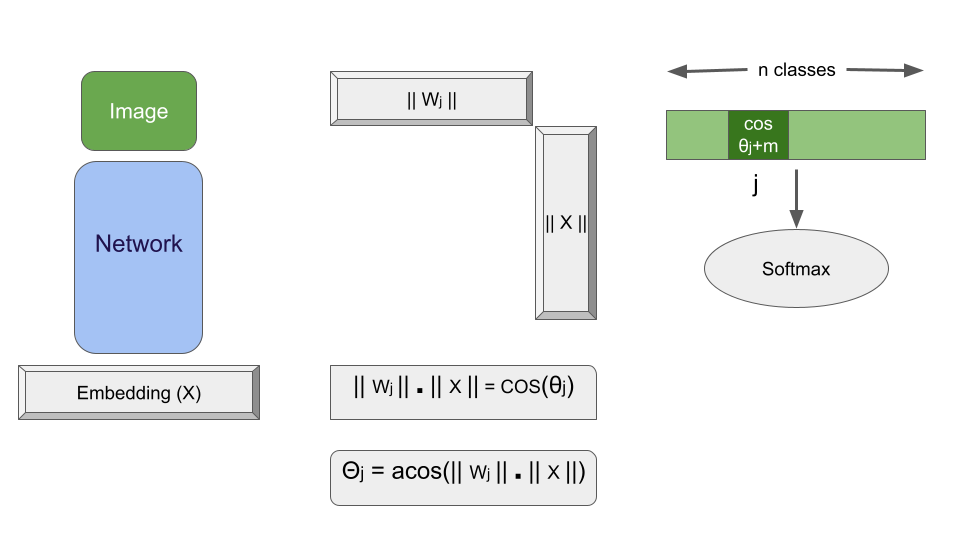

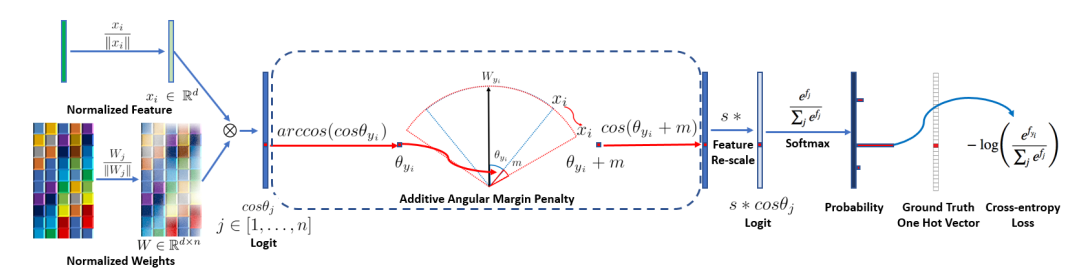

Image credits [arcface loos research paper](https://https://arxiv.org/abs/1801.07698)

* In the arcface we take embeddings from a NN 
* And a weights array of the embedding dimension x number of classes
* We calculate the angle between them
* We calculate cos of the angle above + margin angle
* We get a matrix of size n x n where n is the number of classes in the dataset
* where matrix[y][y] location would be filled with the cos of angle between weight array and embedding array + margin angle and all the other cells are filled with cos of angle between corresponding weight and embedding
* This is fed to softmax classifier to get the output

In [ ]:
def get_dataset_arcface(df, train):
  '''
  This function takes a dataframe and a boolean
  returns data in arcface input form
  ((image, label_group), label_group)
  '''
  image = df.image
  #mapping the label groups to unique integer
  lg = df.label_group.unique()
  lg = dict(zip(lg, np.arange(len(lg))))
  label_group = df.label_group.map(lg) 

  image = ['/content/train_images/'+i for i in image] #Getting the image locations

  image = tf.data.Dataset.from_tensor_slices(image) #getting tf slices from image list
  label_group = tf.data.Dataset.from_tensor_slices(label_group) #getting tf dataset 

  if train: #If its for training apply augmentation
    image = image.map(image_augmentation)
  else:
    image = image.map(decode_image)

  dataset = tf.data.Dataset.zip(((image, label_group), label_group)) #Ziipng the iputs togetger
  dataset = dataset.batch(128, drop_remainder=False) #Creating batch
  if train: #If data is for training repeat the dataset
    dataset = dataset.repeat()
  dataset = dataset.prefetch(16) #Prefetching for faster loading
  
  return dataset

train_set = get_dataset_arcface(train_dataset, True)

In [ ]:
class ArcMarginProduct(tf.keras.layers.Layer):
    def __init__(self, n_classes, s=30, m=0.50, easy_margin=False,
                 ls_eps=0.0, **kwargs):
      '''
      This ArcMargin Layer takes embeddings and returns the onhot encoded form of output
      where every cell is filled with cos of the angle between them and the cell
      where actual output is present is filled with cos of the angle+margin
      '''

      super(ArcMarginProduct, self).__init__(**kwargs)

      self.n_classes = n_classes #Number of classes
      self.s = s #Maultiplicative factor
      self.m = m ##Additive factor

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'n_classes': self.n_classes,
            's': self.s,
            'm': self.m
        })
        return config

    def build(self, input_shape):
      super(ArcMarginProduct, self).build(input_shape[0])

      self.W = self.add_weight( #Defining the weight vector
          name='W',
          shape=(int(input_shape[0][-1]), self.n_classes),
          initializer='glorot_uniform',
          dtype='float32',
          trainable=True,
          regularizer=None)

    def call(self, inputs):
      '''
      This function takes inputs and returs arcface layer outputs
      '''
      X, y = inputs
      y = tf.cast(y, dtype=tf.int32)
      #Getting cos of angle between weight and embedding
      cosine = tf.matmul( 
          tf.math.l2_normalize(X, axis=1),
          tf.math.l2_normalize(self.W, axis=0)
      )
      #Margin factor
      phi = tf.math.cos(tf.math.acos(cosine) + self.m)
      
      one_hot = tf.cast(
          tf.one_hot(y, depth=self.n_classes),
          dtype=cosine.dtype
      )
      output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
      output *= self.s
      return output

N_CLASSES = len(set(train_dataset.label_group))

margin = ArcMarginProduct(
    n_classes = N_CLASSES, 
    s = 30, 
    m = 0.5, 
    name='head/arc_margin', 
    dtype='float32'
    )

In [ ]:
#Defining and initializing Models
#Pretrained MobileNet is used and a base model and 1 conv and 2 dense layers are 
#addded on it one of them is output layer
label = tf.keras.layers.Input(shape = (), name = 'inp2')
model = tf.keras.applications.MobileNet(weights = 'imagenet',
                                        include_top = False, input_shape=(224,224,3), dropout=0.1)
output = tf.keras.layers.Conv2D(1024, 3, (2,2))(model.output)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(256, activation='relu')(output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.1)(output)
output = tf.keras.layers.Dense(128)(output)

embedding = tf.keras.Model(model.input, output)
embedding.trainable = True

#Calling Arcface layer
x = margin([embedding.output, label])
#Getting softmax of the output
output = tf.keras.layers.Softmax(dtype='float32')(x)
arcface = tf.keras.Model(inputs = [model.input, label], outputs = [output])
opt = tf.keras.optimizers.Adam(learning_rate = 0.0005) #defing optimizer

#Compiling the model
arcface.compile(
    optimizer = opt,
    loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
    ) 

In [ ]:
#Defining the callbacks
checkpoint_dir = 'arcface/'
my_callbacks = [
    CustomCallback(valid_images, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
arcface.fit(train_set, epochs=10, callbacks=my_callbacks, steps_per_epoch=500)

Epoch 1/10

  6/500 [..............................] - ETA: 6:04 - loss: 26.2763

54/54 [==============================] - 15s 239ms/step


100%|██████████| 21/21 [00:02<00:00,  9.83it/s]



 Score : 0.7297595120523537


500/500 [==============================] - 478s 924ms/step - loss: 19.8653

Epoch 2/10

54/54 [==============================] - 14s 259ms/step


100%|██████████| 21/21 [00:01<00:00, 12.17it/s]



 Score : 0.7443583847187857


500/500 [==============================] - 460s 919ms/step - loss: 11.1900

Epoch 3/10

54/54 [==============================] - 14s 263ms/step


100%|██████████| 21/21 [00:01<00:00, 12.71it/s]



 Score : 0.750170708558355


500/500 [==============================] - 439s 879ms/step - loss: 6.2883

Epoch 4/10

54/54 [==============================] - 15s 267ms/step


100%|██████████| 21/21 [00:01<00:00, 12.69it/s]



 Score : 0.7509841029461543


500/500 [==============================] - 437s 875ms/step - loss: 3.9613

Epoch 5/10

54/54 [==============================] - 14s 263ms/step


100%|██████████| 21/21 [00:01<00:00, 13.14it/s]

 Score : 0.7490169394303424

500/500 [==============================] - 433s 866ms/step - loss: 2.7243

Epoch 6/10


54/54 [==============================] - 14s 261ms/step


100%|██████████| 21/21 [00:01<00:00, 12.41it/s]

 Score : 0.7400032370323611

500/500 [==============================] - 423s 845ms/step - loss: 1.9278

Epoch 7/10


54/54 [==============================] - 14s 260ms/step


100%|██████████| 21/21 [00:01<00:00, 13.25it/s]

 Score : 0.7388709250514816

500/500 [==============================] - 423s 846ms/step - loss: 1.3540

Epoch 8/10


54/54 [==============================] - 14s 266ms/step


100%|██████████| 21/21 [00:01<00:00, 12.12it/s]



 Score : 0.7405849049404605


500/500 [==============================] - 435s 869ms/step - loss: 0.9924

Epoch 9/10

54/54 [==============================] - 14s 266ms/step


100%|██████████| 21/21 [00:01<00:00, 12.31it/s]

 Score : 0.7327695587011384

500/500 [==============================] - 424s 848ms/step - loss: 0.7660

Epoch 10/10


54/54 [==============================] - 14s 264ms/step


100%|██████████| 21/21 [00:01<00:00, 11.56it/s]



 Score : 0.7365030295669666


500/500 [==============================] - 433s 866ms/step - loss: 0.5960


In [ ]:
#Getting the best model
embedding = tf.keras.models.load_model('/content/arcface/0.7509841029461543/')

In [ ]:
#Getting the embeddings
valid_embeddings = embedding.predict(valid_images, verbose = 1)
test_embeddings = embedding.predict(test_images, verbose = 1)

54/54 [==============================] - 9s 150ms/step

54/54 [==============================] - 8s 148ms/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 12.81it/s]


Best score on validation set : 0.7509841029461543, Best Threshold : 146.59455

Score on test set with Threshold 146.59455 is 0.73486

test NDCG core : 0.8500521469360726


In [ ]:
table.add_row(['Arcface Loss', 'MobileNet + Additional Layers', 'Image', '0.73', '0.85'])

Text Features

In [ ]:
def load_text_dataset(texts):
  '''
  this function takes texts
  returns tensorflow dataset
  '''
  texts = list(texts)
  texts = tf.data.Dataset.from_tensor_slices(texts)
  texts = texts.batch(128, drop_remainder=False)
  texts = texts.prefetch(4)

  return texts

In [ ]:
#loading titles as a tf dataset
train_texts = load_text_dataset(train_dataset.prep_title)
valid_texts = load_text_dataset(valid_dataset.prep_title)
test_texts = load_text_dataset(test_dataset.prep_title)

In [ ]:
#tf-idf tokenizing titles of train and valid dataset
tokenizer = Tokenizer(num_words=12500)
tokenizer.fit_on_texts(train_dataset.prep_title)
train_tfidf = csr_matrix(tokenizer.texts_to_matrix(train_dataset.prep_title, mode='tfidf'))
valid_tfidf = tokenizer.texts_to_matrix(valid_dataset.prep_title, mode='tfidf')

In [ ]:
#Print a random title as a query title
rnd = np.random.randint(len(valid_dataset))
print('Query title')
print(valid_dataset.prep_title[rnd])
query_grp = valid_dataset.label_group[rnd]
print('-'*100)

distances = np.array([linalg.norm(csr_matrix(valid_tfidf[rnd]) - train_tfidf[i]) for i in range(train_tfidf.shape[0])])
similar_title_indices = np.argsort(distances)[:10]

#Printing nearest neighbours of the query titles
print('similar titles')
print(*zip([train_dataset.prep_title[i] for i in similar_title_indices], 
            ['Same Group' if train_dataset.label_group[i]==query_grp else 'Different Group' for i in similar_title_indices]), sep='\n')

Query title

mommyclopedia  567 fakta mpasi

----------------------------------------------------------------------------------------------------

similar titles

('adias', 'Different Group')

('zr206', 'Different Group')

('celluloss', 'Different Group')

('zr208', 'Different Group')

('trouvaille  febie gusfa', 'Different Group')

('seyla jamsui', 'Different Group')

('winglet cbr150r facelift', 'Different Group')

('dosbim   liliana hikari', 'Different Group')

('teluk alaska', 'Different Group')

('trouvaille  febie gusfa', 'Different Group')


In [ ]:
#Get distance matrix and indices matrix of nearesr neighbors of train and validation data
text_d_matrix, text_i_matrix = get_neighbours(valid_tfidf.astype('float32'))
mx_score, mx_thold = get_best_fscore(valid_dataset, text_d_matrix, text_i_matrix) #get the best possible fscore

print('Best Score : {}, Best Threshold : {}'.format(mx_score, mx_thold))
print('Best NDCG core : {}'.format(get_ndcg(valid_dataset, text_i_matrix)))

100%|██████████| 201/201 [01:50<00:00,  1.82it/s]


Best Score : 0.5824309609794422, Best Threshold : 134.60698364257814

Best NDCG core : 0.8321398610839866


In [ ]:
#frequency tokenizing titles of train and valid dataset
tokenizer = Tokenizer(num_words=12500)
tokenizer.fit_on_texts(train_dataset.prep_title)

train_tfidf = csr_matrix(tokenizer.texts_to_matrix(train_dataset.prep_title, mode='freq'))
valid_tfidf = tokenizer.texts_to_matrix(valid_dataset.prep_title, mode='freq')

In [ ]:
#Print a random title as a query title
rnd = np.random.randint(len(valid_dataset))
print('Query title')
print(valid_dataset.prep_title[rnd])
query_grp = valid_dataset.label_group[rnd]
print('-'*100)

distances = np.array([linalg.norm(csr_matrix(valid_tfidf[rnd]) - train_tfidf[i]) for i in range(train_tfidf.shape[0])])
similar_title_indices = np.argsort(distances)[:10]

#Printing nearest neighbours of the query titles
print('similar titles')
print(*zip([train_dataset.prep_title[i] for i in similar_title_indices], 
            ['Same Group' if train_dataset.label_group[i]==query_grp else 'Different Group' for i in similar_title_indices]), sep='\n')

Query title

parfume thailand 35ml

----------------------------------------------------------------------------------------------------

similar titles

('parfume thailand 35mlseries 1', 'Different Group')

('parfume thailand 55 ml', 'Different Group')

('parfum thailand 35ml viral', 'Different Group')

('parfume thailand isi 55ml', 'Different Group')

('ready stock  parfum thailand 35ml', 'Different Group')

('ab parfume thailand 55ml original', 'Different Group')

('parfume thailand isi 55ml best seller termurah', 'Different Group')

('parfume bibit inspired thailan 35ml minyak wangi 3', 'Different Group')

('beli 6 free 1 harga grosir murah ready stok parfume thailand 35 ml', 'Different Group')

('kojic soap thailand super whitening original inport thailand new pack khusus grosir m', 'Different Group')


In [ ]:
#Get distance matrix and indices matrix of nearesr neighbors of train and validation data
text_d_matrix, text_i_matrix = get_neighbours(valid_tfidf.astype('float32'))
mx_score, mx_thold = get_best_fscore(valid_dataset, text_d_matrix, text_i_matrix) #get the best possible fscore

print('Best Score : {}, Best Threshold : {}'.format(mx_score, mx_thold))
print('Best NDCG core : {}'.format(get_ndcg(valid_dataset, text_i_matrix)))

100%|██████████| 201/201 [01:39<00:00,  2.03it/s]


Best Score : 0.6517744815598218, Best Threshold : 0.0907716065645218

Best NDCG core : 0.8664419610024439


In [ ]:
table.add_row(['Baseline', 'freqency tokenizer', 'Title', '0.65', '0.86'])

Contrastive Loss

In [ ]:
def get_pairs(data):
  '''
  This function takes a dataframe and returns pairs of two images and a target
  target says if the two images are of same label group or not 
  '''
  anchor_list = []
  positive_list = []
  negative_list = []
  pairs = []

  print('getting pairs...')
  for i in tqdm.tqdm(range(len(data))):
    anchor = data.prep_title[i] #for every image

    positives = list(data.prep_title[data.label_group == data.label_group[i]]) #Finding images with same label group
    negatives = list(data.prep_title[data.label_group != data.label_group[i]]) #Finding image with different label group

    positives = [random.choice(positives)] #select 1 random image from the list
    negatives = [random.choice(negatives)]
    
    for j in range(len(positives)):
      if (positives[j], anchor) not in pairs: #make sure the image pairs are not already in the list
        anchor_list.append(anchor)
        positive_list.append(positives[j])
        negative_list.append(negatives[j])

        pairs.append((anchor, positives[j])) #making the list of pairs already selected
  
  #Make a 2D list of anchor images, positive and negative images and target (1 for positive image, 0 for negative image)
  lst = list(zip(anchor_list+anchor_list, positive_list+negative_list, [1.0]*len(positive_list)+[0.0]*len(negative_list)))

  #conver list to dataframe
  df = pd.DataFrame(lst, columns =['title1', 'title2', 'target'])
  return df

#Get train paired dataset
traindf = get_pairs(train_dataset)

getting pairs...


100%|██████████| 27442/27442 [02:05<00:00, 218.83it/s]


In [ ]:
def get_dataset(df, train):
  '''
  This function takes a dataframe and a boolean variable
  returns tensorflow dataset in contrastive model format
  ((title1, title2), target)
  '''
  #Getting the titles
  title1 = df.title1
  title2 = df.title2
  target = df.target
  #Converting the titles into numpy arrays
  title1 = np.array(title1)
  title2 = np.array(title2)
  target = np.array(target)
  #Returning in the required input  form
  input = (title1, title2)
  return input, target

train_set_input, train_set_target = get_dataset(traindf, True)

In [ ]:
#Defining and initializing Models
#Pretrained small bert is used and a base model
input = tf.keras.layers.Input(shape=(), dtype=tf.string)
tokenizer = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
tokenizer = hub.KerasLayer(tokenizer, name='tokenizer')(input)
tokenizer = tf.keras.Model(inputs=input, outputs = tokenizer)
tokenizer.trainable = False
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True)(tokenizer.output)
embedding = tf.keras.Model(inputs=input, outputs = encoder["pooled_output"])
embedding.trainable = True

input1 = tf.keras.layers.Input(shape=(), dtype=tf.string)
input2 = tf.keras.layers.Input(shape=(), dtype=tf.string)

tower_1 = embedding(input1)
tower_2 = embedding(input2)
'''
In contrastive model tower1 and tower2 are with same embedding model with same weight
'''
#This layer calculates euclidean distance between outputs from tower1 and tower2
merge_layer = tf.keras.layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer) #Normalizing distance output
#This layer decides if the images are same or not based on the distance between them
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(normal_layer)
#Defining contrastive Model
contrastive = tf.keras.Model(inputs=[input1, input2], outputs=normal_layer)

ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


In [ ]:
#Defining the callbacks
checkpoint_dir = 'contrastive/'
my_callbacks = [
    CustomCallback(valid_texts, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
#Compiling the model
contrastive.compile(loss=loss(margin=1), optimizer=tf.keras.optimizers.Adam(0.0001))
contrastive.summary()

Model: "model_22"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_29 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 input_30 (InputLayer)          [(None,)]            0           []                               

                                                                                                  

 model_21 (Functional)          (None, 128)          4385921     ['input_29[0][0]',               

                                                                  'input_30[0][0]']               

                                                                                                  

 lambda_1 (Lambda)              (None, 1)            0           ['model_21[0][0

In [ ]:
contrastive.fit(train_set_input, train_set_target, epochs=10, callbacks=my_callbacks, steps_per_epoch=500)




Got `type(handle)`: <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


Epoch 1/10

27/27 [==============================] - 15s 535ms/step


100%|██████████| 21/21 [00:01<00:00, 12.27it/s]



 Score : 0.6668401808486455


500/500 [==============================] - 376s 744ms/step - loss: 0.1063

Epoch 2/10

27/27 [==============================] - 15s 538ms/step


100%|██████████| 21/21 [00:01<00:00, 12.63it/s]



 Score : 0.6701800184799385


500/500 [==============================] - 374s 746ms/step - loss: 0.0778

Epoch 3/10

27/27 [==============================] - 15s 543ms/step


100%|██████████| 21/21 [00:01<00:00, 12.32it/s]

 Score : 0.6685420699729092

500/500 [==============================] - 368s 736ms/step - loss: 0.0626

Epoch 4/10


27/27 [==============================] - 14s 528ms/step


100%|██████████| 21/21 [00:01<00:00, 13.11it/s]

 Score : 0.6622936646361937

500/500 [==============================] - 370s 739ms/step - loss: 0.0522

Epoch 5/10


27/27 [==============================] - 14s 537ms/step


100%|██████████| 21/21 [00:01<00:00, 13.77it/s]



 Score : 0.6679370575859218


500/500 [==============================] - 372s 744ms/step - loss: 0.0434

Epoch 6/10

27/27 [==============================] - 15s 543ms/step


100%|██████████| 21/21 [00:01<00:00, 11.24it/s]

 Score : 0.6644965733746906

500/500 [==============================] - 371s 742ms/step - loss: 0.0366

Epoch 7/10


27/27 [==============================] - 15s 542ms/step


100%|██████████| 21/21 [00:01<00:00, 12.76it/s]

 Score : 0.6638027109180553

500/500 [==============================] - 368s 735ms/step - loss: 0.0307

Epoch 8/10


27/27 [==============================] - 14s 524ms/step


100%|██████████| 21/21 [00:01<00:00, 12.13it/s]



 Score : 0.6738243625684912


500/500 [==============================] - 369s 737ms/step - loss: 0.0255

Epoch 9/10

27/27 [==============================] - 14s 535ms/step


100%|██████████| 21/21 [00:01<00:00, 12.91it/s]

 Score : 0.6693663609836035

500/500 [==============================] - 363s 727ms/step - loss: 0.0218

Epoch 10/10


27/27 [==============================] - 14s 527ms/step


100%|██████████| 21/21 [00:01<00:00, 13.30it/s]



 Score : 0.6717741305203248


500/500 [==============================] - 370s 740ms/step - loss: 0.0182


In [ ]:
#Getting the best model
embedding = tf.keras.models.load_model('/content/contrastive/0.6717741305203248/')

#Getting the embeddings
valid_embeddings = embedding.predict(valid_texts, verbose = 1)
test_embeddings = embedding.predict(test_texts, verbose = 1)

56/56 [==============================] - 234s 4s/step

55/55 [==============================] - 210s 4s/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 11.45it/s]



Best score on validation set : 0.67177, Best Threshold : 24.85587

Score on test set with Threshold 24.85587 is 0.66759

test NDCG core : 0.78947


In [ ]:
table.add_row(['Contrastive Loss', 'Small Bert', 'Title', '0.67', '0.78'])

Triplet Loss

In [ ]:
def get_triplets(data):
  '''
  This function takes a dataframe
  returns a dataframe containing a triplet of
  anchor image, similar image and a dissimilar image
  '''
  anchor_list = []
  positive_list = []
  negative_list = []
  pairs = []
  print('getting triplets...')
  for i in tqdm.tqdm(range(len(data))):
    anchor = data.prep_title[i] #Get Anchor titles
    positives = list(data.prep_title[data.label_group == data.label_group[i]]) #Get titles of same label grp as anchor title
    negatives = list(data.prep_title[data.label_group != data.label_group[i]]) #Get titles of different label group
    negatives = np.random.choice(negatives, len(positives)) #Get the same number of negatives as 
    for j in range(len(positives)):
      if (positives[j], anchor) not in pairs:
        anchor_list.append(anchor)
        positive_list.append(positives[j])
        negative_list.append(negatives[j])

        pairs.append((anchor, positives[j])) #Keeping a note of all the pairs

  #Creating a dataframe of triplets
  lst = list(zip(anchor_list, positive_list, negative_list))
  df = pd.DataFrame(lst, columns =['anchor', 'positive', 'negative'], dtype = str)

  return df

traindf = get_triplets(train_dataset)

getting triplets...


100%|██████████| 27277/27277 [10:39<00:00, 42.65it/s]


In [ ]:
def get_dataset(df, train):
  '''
  This function takes a dataframe and a boolean variable
  returns tensorflow dataset in triplet loss model format
  (anchor_titles, positive_titles, negative_titles)
  '''
  anchor_titles = df.anchor
  positive_titles = df.positive
  negative_titles = df.negative
  #Converting the titles into numpy arrays
  anchor_dataset = np.array(anchor_titles)
  positive_dataset = np.array(positive_titles)
  negative_dataset = np.array(negative_titles)
  #Returning in the required input  form
  dataset = (anchor_dataset, positive_dataset, negative_dataset)

  return dataset

train_set = get_dataset(traindf, True)

In [ ]:
#Defining and initializing Models
#Pretrained small bert is used and a base model
input = tf.keras.layers.Input(shape=(), dtype=tf.string)
tokenizer = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
tokenizer = hub.KerasLayer(tokenizer, name='tokenizer')(input)
tokenizer = tf.keras.Model(inputs=input, outputs = tokenizer)
tokenizer.trainable = False
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True)(tokenizer.output)
embedding = tf.keras.Model(inputs=input, outputs = encoder["pooled_output"])
embedding.trainable = True

anchor_input = tf.keras.layers.Input(name="anchor", shape=(), dtype=tf.string)
positive_input = tf.keras.layers.Input(name="positive", shape=(), dtype=tf.string)
negative_input = tf.keras.layers.Input(name="negative", shape=(), dtype=tf.string)

#Passing the embedding layer outputs to distance layer
distances = DistanceLayer()(
    embedding(anchor_input),
    embedding(positive_input),
    embedding(negative_input),
)

siamese_network = tf.keras.Model( #Defining siamese network
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)


siamese_model = SiameseModel(siamese_network) #Defining siamese model
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001))

ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


In [ ]:
#Defining the callbacks
checkpoint_dir = 'siamese/'
my_callbacks = [
    CustomCallback(valid_texts, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
siamese_model.fit(train_set, epochs=10, callbacks= my_callbacks, steps_per_epoch=500)

Epoch 1/10

28/28 [==============================] - 15s 514ms/step


100%|██████████| 21/21 [00:01<00:00, 11.34it/s]



 Score : 0.6293732516589764


500/500 [==============================] - 851s 2s/step - loss: 0.0386

Epoch 2/10

28/28 [==============================] - 15s 528ms/step


100%|██████████| 21/21 [00:01<00:00, 11.91it/s]



 Score : 0.6530587054570146


500/500 [==============================] - 838s 2s/step - loss: 0.0071

Epoch 3/10

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 12.23it/s]



 Score : 0.6577598647160825


500/500 [==============================] - 825s 2s/step - loss: 0.0037

Epoch 4/10

28/28 [==============================] - 14s 515ms/step


100%|██████████| 21/21 [00:01<00:00, 11.89it/s]

 Score : 0.6447268240996039

500/500 [==============================] - 831s 2s/step - loss: 0.0032

Epoch 5/10


28/28 [==============================] - 15s 522ms/step


100%|██████████| 21/21 [00:01<00:00, 11.84it/s]



 Score : 0.663079636029826


500/500 [==============================] - 827s 2s/step - loss: 0.0041

Epoch 6/10

28/28 [==============================] - 15s 526ms/step


100%|██████████| 21/21 [00:01<00:00, 10.89it/s]

 Score : 0.6428070141140347

500/500 [==============================] - 823s 2s/step - loss: 0.0026

Epoch 7/10


28/28 [==============================] - 15s 519ms/step


100%|██████████| 21/21 [00:01<00:00, 11.89it/s]



 Score : 0.6490318189844974


500/500 [==============================] - 831s 2s/step - loss: 0.0029

Epoch 8/10

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 12.30it/s]



 Score : 0.6603416288705761


500/500 [==============================] - 826s 2s/step - loss: 0.0020

Epoch 9/10

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 11.92it/s]

 Score : 0.6367469834562964

500/500 [==============================] - 818s 2s/step - loss: 0.0023

Epoch 10/10


28/28 [==============================] - 14s 514ms/step


100%|██████████| 21/21 [00:01<00:00, 11.77it/s]

 Score : 0.6196488969618067

500/500 [==============================] - 820s 2s/step - loss: 0.0026


In [ ]:
#Getting the best model
embedding = tf.keras.models.load_model('/content/siamese/0.663079636029826')

#Getting the embeddings
valid_embeddings = embedding.predict(valid_texts, verbose = 1)
test_embeddings = embedding.predict(test_texts, verbose = 1)

56/56 [==============================] - 264s 5s/step

55/55 [==============================] - 278s 5s/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:02<00:00,  7.61it/s]



Best score on validation set : 0.66307, Best Threshold : 19.62241

Score on test set with Threshold 19.62241 is 0.66008

test NDCG core : 0.74096


In [ ]:
table.add_row(['Triplet Loss', 'Small Bert', 'Title', '0.66', '0.74'])

Arcface

In [ ]:
def get_dataset_arcface(df, train):

  '''
  This function takes a dataframe and a boolean
  returns data in arcface input form
  ((title, label_group), label_group)
  '''
  text = train_dataset.prep_title
  #mapping the label groups to unique integer
  lg = train_dataset.label_group.unique()
  lg = dict(zip(lg, np.arange(len(lg))))
  label_group = train_dataset.label_group.map(lg)

  #Converting the titles into numpy arrays
  text = np.array(text)
  label_group = np.array(label_group)

  dataset = ((text, label_group), label_group)

  return dataset

train_set = get_dataset_arcface(train_dataset, True)

In [ ]:
margin = ArcMarginProduct(
    n_classes = N_CLASSES, 
    s = 30, 
    m = 0.5, 
    name='head/arc_margin', 
    dtype='float32'
    )

#Defining and initializing Models
#Pretrained small bert is used and a base model
input = tf.keras.layers.Input(shape=(), dtype=tf.string)
tokenizer = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
tokenizer = hub.KerasLayer(tokenizer, name='tokenizer')(input)
tokenizer = tf.keras.Model(inputs=input, outputs = tokenizer)
tokenizer.trainable = False
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True)(tokenizer.output)
embedding = tf.keras.Model(inputs=input, outputs = encoder["pooled_output"])
label = tf.keras.layers.Input(shape = (), name = 'inp2')
embedding.trainable = True

#Calling Arcface layer
x = margin([embedding.output, label])
#Getting softmax of the output
output = tf.keras.layers.Softmax(dtype='float32')(x)
arcface = tf.keras.Model(inputs = [model.input, label], outputs = [output])
opt = tf.keras.optimizers.Adam(learning_rate = 0.0005) #defing optimizer

#Compiling the model
arcface.compile(
    optimizer = opt,
    loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
    ) 

In [ ]:
#Defining the callbacks
checkpoint_dir = 'arcface/'
my_callbacks = [
    CustomCallback(valid_texts, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
arcface.fit(train_set, epochs=25, callbacks=my_callbacks, batch_size=128)




Got `type(handle)`: <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


Epoch 1/25


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


28/28 [==============================] - 15s 511ms/step


100%|██████████| 21/21 [00:01<00:00, 13.51it/s]



 Score : 0.5495421787013169


214/214 [==============================] - 151s 689ms/step - loss: 24.9594

Epoch 2/25

28/28 [==============================] - 14s 511ms/step


100%|██████████| 21/21 [00:01<00:00, 11.81it/s]

 Score : 0.5436217619973501

214/214 [==============================] - 139s 650ms/step - loss: 23.0942

Epoch 3/25


28/28 [==============================] - 14s 515ms/step


100%|██████████| 21/21 [00:01<00:00, 12.50it/s]

 Score : 0.5377370334406231

214/214 [==============================] - 141s 656ms/step - loss: 22.7655

Epoch 4/25


28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 12.53it/s]



 Score : 0.5431783784647805


214/214 [==============================] - 145s 679ms/step - loss: 22.5202

Epoch 5/25

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 12.53it/s]



 Score : 0.5470079655831199


214/214 [==============================] - 143s 669ms/step - loss: 22.2115

Epoch 6/25

28/28 [==============================] - 14s 511ms/step


100%|██████████| 21/21 [00:01<00:00, 12.14it/s]



 Score : 0.5560288879916588


214/214 [==============================] - 145s 677ms/step - loss: 21.8263

Epoch 7/25

28/28 [==============================] - 14s 511ms/step


100%|██████████| 21/21 [00:01<00:00, 13.80it/s]



 Score : 0.5577727618845449


214/214 [==============================] - 145s 679ms/step - loss: 21.3811

Epoch 8/25

28/28 [==============================] - 14s 510ms/step


100%|██████████| 21/21 [00:01<00:00, 13.21it/s]



 Score : 0.5640567116576203


214/214 [==============================] - 187s 875ms/step - loss: 20.8960

Epoch 9/25

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 12.34it/s]



 Score : 0.5695963480703334


214/214 [==============================] - 143s 671ms/step - loss: 20.4052

Epoch 10/25

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 12.41it/s]



 Score : 0.5761993909490115


214/214 [==============================] - 145s 680ms/step - loss: 19.8999

Epoch 11/25

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 12.09it/s]



 Score : 0.5842328747645887


214/214 [==============================] - 146s 681ms/step - loss: 19.4066

Epoch 12/25

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 11.05it/s]



 Score : 0.5865673973838859


214/214 [==============================] - 144s 675ms/step - loss: 18.9075

Epoch 13/25

28/28 [==============================] - 14s 510ms/step


100%|██████████| 21/21 [00:01<00:00, 12.52it/s]



 Score : 0.5938155395533701


214/214 [==============================] - 145s 679ms/step - loss: 18.3932

Epoch 14/25

28/28 [==============================] - 14s 515ms/step


100%|██████████| 21/21 [00:01<00:00, 11.96it/s]



 Score : 0.6026952813851667


214/214 [==============================] - 145s 679ms/step - loss: 17.8716

Epoch 15/25

28/28 [==============================] - 14s 508ms/step


100%|██████████| 21/21 [00:01<00:00, 12.70it/s]



 Score : 0.6147261236674683


214/214 [==============================] - 149s 698ms/step - loss: 17.3606

Epoch 16/25

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 11.72it/s]



 Score : 0.6235544161102102


214/214 [==============================] - 145s 680ms/step - loss: 16.8299

Epoch 17/25

28/28 [==============================] - 14s 513ms/step


100%|██████████| 21/21 [00:01<00:00, 11.68it/s]



 Score : 0.6395858463327269


214/214 [==============================] - 146s 685ms/step - loss: 16.2885

Epoch 18/25

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 11.79it/s]



 Score : 0.6636166020295576


214/214 [==============================] - 144s 672ms/step - loss: 15.7506

Epoch 19/25

28/28 [==============================] - 14s 517ms/step


100%|██████████| 21/21 [00:01<00:00, 12.75it/s]



 Score : 0.6735115734175804


214/214 [==============================] - 146s 682ms/step - loss: 15.2146

Epoch 20/25

28/28 [==============================] - 14s 514ms/step


100%|██████████| 21/21 [00:01<00:00, 11.87it/s]



 Score : 0.694342732083285


214/214 [==============================] - 146s 682ms/step - loss: 14.6831

Epoch 21/25

28/28 [==============================] - 14s 516ms/step


100%|██████████| 21/21 [00:01<00:00, 11.54it/s]



 Score : 0.7146804880791021


214/214 [==============================] - 144s 671ms/step - loss: 14.1689

Epoch 22/25

28/28 [==============================] - 15s 518ms/step


100%|██████████| 21/21 [00:01<00:00, 10.92it/s]



 Score : 0.7238810524467535


214/214 [==============================] - 146s 681ms/step - loss: 13.6513

Epoch 23/25

28/28 [==============================] - 14s 516ms/step


100%|██████████| 21/21 [00:01<00:00, 12.46it/s]



 Score : 0.7304025112219014


214/214 [==============================] - 145s 679ms/step - loss: 13.1431

Epoch 24/25

28/28 [==============================] - 14s 511ms/step


100%|██████████| 21/21 [00:01<00:00, 11.50it/s]



 Score : 0.7369491446227376


214/214 [==============================] - 144s 672ms/step - loss: 12.6761

Epoch 25/25

28/28 [==============================] - 14s 508ms/step


100%|██████████| 21/21 [00:01<00:00, 11.99it/s]



 Score : 0.7411520351495747


214/214 [==============================] - 145s 680ms/step - loss: 12.2024


In [ ]:
#get test and valid images embeddings
valid_embeddings = embedding.predict(valid_texts, verbose = 1)
test_embeddings = embedding.predict(test_texts, verbose = 1)

28/28 [==============================] - 16s 578ms/step

27/27 [==============================] - 14s 522ms/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 11.94it/s]


Best score on validation set : 0.7411520351495747, Best Threshold : 25.26351

Score on test set with Threshold 25.26351 is 0.76274

test NDCG core : 0.9088463392937326


In [ ]:
table.add_row(['Arcface Loss', 'Small Bert', 'Title', '0.74', '0.90'])

OCR Features

In [ ]:
def get_ocr(images):
  '''
  This function takes a dataset and returns the text written in the image
  '''
  config = ('-l eng --oem 1 --psm 3')
  a = []
  for i in tqdm.tqdm(range(len(images))):
    image = 'train_images/' + str(images[i])
    # Read image from disk
    im = cv2.imread(image, 0)
    # Run tesseract OCR on image
    text = pytesseract.image_to_string(im, config=config)
    a.append(text)
  return a

valid_dataset['ocr'], test_dataset['ocr'] = get_ocr(valid_dataset.image), get_ocr(test_dataset.image)
valid_dataset['prep_ocr'] = valid_dataset.ocr.map(preprocessing)
test_dataset['prep_ocr'] = test_dataset.ocr.map(preprocessing)

In [ ]:
#Get the data points where pytesseract is able to extract some text 
valid_ocr = valid_dataset[(valid_dataset['prep_ocr'].str.len() > 2)].reset_index()
test_ocr = test_dataset[(test_dataset['prep_ocr'].str.len() > 2)].reset_index()

#We will get the index of each datapoint in the dataset
a = []
for i in range(len(valid_ocr)):
  a.append(set(np.where(valid_ocr.label_group == valid_ocr.label_group[i])[0]))
valid_ocr['similars'] = a

a = []
for i in range(len(test_ocr)):
  a.append(set(np.where(test_ocr.label_group == test_ocr.label_group[i])[0]))
test_ocr['similars'] = a

In [ ]:
#Getting the ocr_text embeddings
valid_embeddings = model.predict(np.array(valid_ocr['prep_ocr']))
test_embeddings = model.predict(np.array(test_ocr['prep_ocr']))

51/51 [==============================] - 3s 53ms/step

46/46 [==============================] - 2s 53ms/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_ocr, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_ocr, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_ocr, test_img_i_matrix)))

100%|██████████| 21/21 [00:00<00:00, 21.52it/s]


Best score on validation set : 0.6801952612154917, Best Threshold : 28.94674

Score on test set with Threshold 28.94674 is 0.66680

test NDCG core : 0.7441848763760573


In [ ]:
table.add_row(['Arcface Loss', 'Small Bert', 'Image OCR', '0.66', '0.74'])

Combining best models from all the three datasources

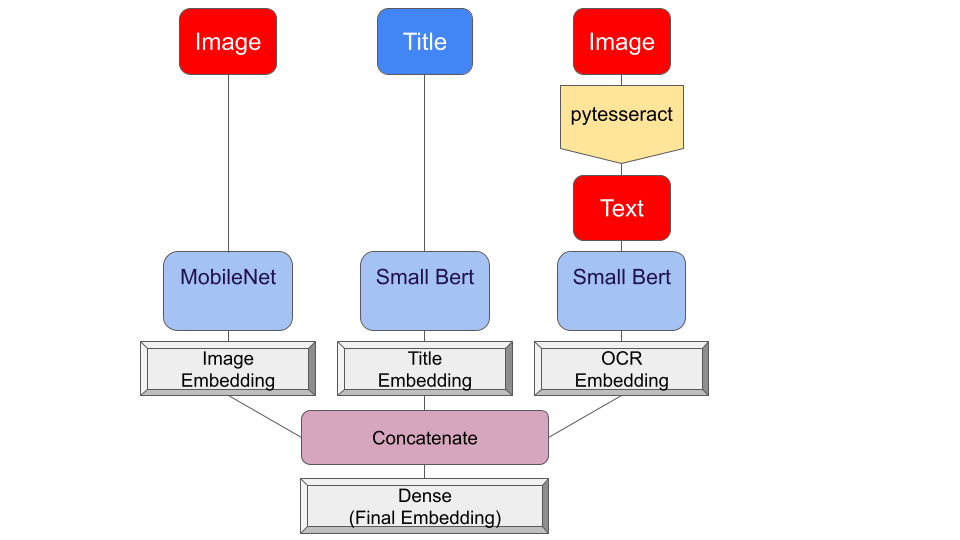

In [ ]:
def get_dataset_arcface(df, train):
  '''
  This function takes a dataframe and a boolean
  returns data in arcface input form
  (((image, title, ocr_text), label_group), label_group)
  '''
  #mapping the label groups to unique integer
  lg = df.label_group.unique()
  lg = dict(zip(lg, np.arange(len(lg))))
  label_group = df.label_group.map(lg) 


  image = df.image
  image = ['/content/train_images/'+i for i in image] #Getting the image locations
  image = tf.data.Dataset.from_tensor_slices(image) #getting tf slices from image list

  text = df.prep_title #Get preprocessed titles
  text = tf.data.Dataset.from_tensor_slices(text)

  ocr_text = df.prep_ocr #Get preprocessed ocr texts
  ocr_text = tf.data.Dataset.from_tensor_slices(ocr_text)

  label_group = tf.data.Dataset.from_tensor_slices(label_group) #getting tf dataset 

  if train: #If its for training apply augmentation
    image = image.map(image_augmentation)
  else:
    image = image.map(decode_image)

  dataset = tf.data.Dataset.zip((((image, text, ocr_text), label_group), label_group)) #Ziipng the iputs togetger
  dataset = dataset.batch(64, drop_remainder=False) #Creating batch
  if train: #If data is for training repeat the dataset
    dataset = dataset.repeat()
  dataset = dataset.prefetch(4) #Prefetching for faster loading
  
  return dataset

train_set = get_dataset_arcface(train_dataset, True)

In [ ]:
def load_dataset(texts, ocr_text, images, location):
  '''
  this function takes texts, ocr_texts, images
  returns tensorflow dataset
  '''
  texts = list(texts) #Get titles
  texts = tf.data.Dataset.from_tensor_slices(texts)

  ocr_text = list(ocr_text) #Get ocr texts
  ocr_text = tf.data.Dataset.from_tensor_slices(ocr_text)

  images = list(images) #Get images
  images = [location+i for i in images] #Add location of the image to name of the image
  images = tf.data.Dataset.from_tensor_slices(images) #Conver image list to tf dataset
  images = images.map(decode_image) #Mapping the image dataset to decode image

  dataset = tf.data.Dataset.zip((images, texts, ocr_text)) #Creating dataset
  dataset = dataset.batch(len(images), drop_remainder=False) #Creating Batches

  return dataset

In [ ]:
#loading images as a tf dataset
valid_data = load_dataset(valid_dataset.prep_title, valid_dataset.prep_ocr, valid_dataset.image,  '/content/train_images/')
test_data = load_dataset(test_dataset.prep_title, test_dataset.prep_ocr, test_dataset.image,  '/content/train_images/')

In [ ]:
margin = ArcMarginProduct(
    n_classes = N_CLASSES, 
    s = 30, 
    m = 0.5, 
    name='head/arc_margin', 
    dtype='float32'
    )

#Defining and initializing image Model
#Pretrained MobileNet is used and a base model and 1 conv and 2 dense layers are 
#addded on it one of them is output layer
label = tf.keras.layers.Input(shape = (), name = 'inp2')
image_model = tf.keras.applications.MobileNet(weights = 'imagenet',
                                        include_top = False, input_shape=(224,224,3), dropout=0.1)
image_output = tf.keras.layers.Conv2D(1024, 3, (2,2))(image_model.output)
image_output = tf.keras.layers.GlobalAveragePooling2D()(image_output)
image_output = tf.keras.layers.Dense(256, activation='relu')(image_output)
image_output = tf.keras.layers.BatchNormalization()(image_output)
image_output = tf.keras.layers.Dropout(0.1)(image_output)
image_output = tf.keras.layers.Dense(128)(image_output)


#Defining and initializing text Model
#Pretrained small bert is used and a base model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
tokenizer = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
tokenizer = hub.KerasLayer(tokenizer, name='tokenizer')(text_input)
tokenizer = tf.keras.Model(inputs=text_input, outputs = tokenizer)
tokenizer.trainable = False
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True)(tokenizer.output)
text_output = encoder["pooled_output"]


#Defining and initializing ocrtext Model
#Pretrained small bert is used and a base model
ocr_text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
tokenizer = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
tokenizer = hub.KerasLayer(tokenizer, name='ocr_tokenizer')(ocr_text_input)
tokenizer = tf.keras.Model(inputs=ocr_text_input, outputs = tokenizer)
tokenizer.trainable = False
ocr_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2", trainable=True)(tokenizer.output)
ocr_text_output = ocr_encoder["pooled_output"]

output = tf.keras.layers.Concatenate()([image_output, text_output, ocr_text_output])
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.1)(output)
output = tf.keras.layers.Dense(128)(output)

embedding = tf.keras.Model(inputs = [image_model.input, text_input, ocr_text_input], outputs = output)
embedding.trainable = True

#Calling Arcface layer
x = margin([embedding.output, label])
#Getting softmax of the output
output = tf.keras.layers.Softmax(dtype='float32')(x)
arcface = tf.keras.Model(inputs = [(image_model.input, text_input, ocr_text_input), label], outputs = [output])
opt = tf.keras.optimizers.Adam(learning_rate = 0.0005) #defing optimizer

#Compiling the model
arcface.compile(
    optimizer = opt,
    loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
    ) 

In [ ]:
#Defining the callbacks
checkpoint_dir = 'arcface/'
my_callbacks = [
    CustomCallback(valid_data, valid_dataset, embedding, checkpoint_dir),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
arcface.fit(train_set, epochs=7, callbacks=my_callbacks, steps_per_epoch=500)




Got `type(handle)`: <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>


Epoch 1/7


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.

ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


104/104 [==============================] - 14s 126ms/step


100%|██████████| 21/21 [00:01<00:00, 13.52it/s]



 Score : 0.7628901472568399


500/500 [==============================] - 464s 891ms/step - loss: 22.4939

Epoch 2/7

104/104 [==============================] - 13s 125ms/step


100%|██████████| 21/21 [00:01<00:00, 12.57it/s]



 Score : 0.8205437301649376


500/500 [==============================] - 443s 887ms/step - loss: 16.5342

Epoch 3/7

104/104 [==============================] - 15s 140ms/step


100%|██████████| 21/21 [00:01<00:00, 13.16it/s]



 Score : 0.8385930683210282


500/500 [==============================] - 444s 888ms/step - loss: 11.1526

Epoch 4/7

104/104 [==============================] - 13s 126ms/step


100%|██████████| 21/21 [00:01<00:00, 13.75it/s]

 Score : 0.8371696317889757

500/500 [==============================] - 425s 851ms/step - loss: 7.5023

Epoch 5/7


104/104 [==============================] - 13s 125ms/step


100%|██████████| 21/21 [00:01<00:00, 12.69it/s]



 Score : 0.8462967092376682


500/500 [==============================] - 447s 895ms/step - loss: 5.1637

Epoch 6/7

104/104 [==============================] - 13s 125ms/step


100%|██████████| 21/21 [00:01<00:00, 14.04it/s]

 Score : 0.8375615817092019

500/500 [==============================] - 425s 850ms/step - loss: 3.7015

Epoch 7/7


104/104 [==============================] - 13s 124ms/step


100%|██████████| 21/21 [00:01<00:00, 11.53it/s]

 Score : 0.8338643038414721

500/500 [==============================] - 421s 841ms/step - loss: 2.7362


In [ ]:
#Loading the best model
embedding = tf.keras.models.load_model('/content/arcface/0.8462967092376682')

#Getting the ocr_text embeddings
valid_embeddings = embedding.predict(valid_data)
test_embeddings = embedding.predict(test_data)

104/104 [==============================] - 16s 146ms/step

108/108 [==============================] - 14s 127ms/step


In [ ]:
#Get the best threshold
valid_img_d_matrix, valid_img_i_matrix = get_neighbours(valid_embeddings)
mx_score, mx_thold = get_best_fscore(valid_dataset, valid_img_d_matrix, valid_img_i_matrix)

print('Best score on validation set : {}, Best Threshold : {:.5f}'.format(mx_score, mx_thold))

test_img_d_matrix, test_img_i_matrix = get_neighbours(test_embeddings)
mx_score = get_fscore(test_dataset, test_img_d_matrix, test_img_i_matrix, mx_thold)

print('Score on test set with Threshold {:.5f} is {:.5f}'.format(mx_thold, mx_score))
print('test NDCG core : {}'.format(get_ndcg(test_dataset, test_img_i_matrix)))

100%|██████████| 21/21 [00:01<00:00, 13.66it/s]


Best score on validation set : 0.8462967092376682, Best Threshold : 306.01899

Score on test set with Threshold 306.01899 is 0.83009

test NDCG core : 0.9541724166987786


In [ ]:
table.add_row(['Arcface Loss', 'MobileNet + Small Bert', 'Image + Title + Image OCR', '0.83', '0.95'])

Summerizing all the models

In [ ]:
print(table)

+------------------+-------------------------------+---------------------------+--------+--------+

|      Model       |          Archetecture         |          features         | Fscore |  NDCG  |

+------------------+-------------------------------+---------------------------+--------+--------+

|     Baseline     |           MobileNet           |           Image           |  0.68  | 0.8415 |

| Contrastive Loss | MobileNet + Additional Layers |           Image           |  0.57  |  0.79  |

|   Triplet Loss   | MobileNet + Additional Layers |           Image           |  0.63  |  0.80  |

|   Arcface Loss   | MobileNet + Additional Layers |           Image           |  0.73  |  0.85  |

|     Baseline     |       freqency tokenizer      |           Title           |  0.65  |  0.86  |

| Contrastive Loss |           Small Bert          |           Title           |  0.67  |  0.78  |

|   Triplet Loss   |           Small Bert          |           Title           |  0.66  |  0.74  |

